# Introduction

Kelompok 1

Nama Anggota:
• Reynaldi Ananda Putra / PYTN-KS20-014
• Reva Fahrian Natamenggala / PYTN-KS20-017
• Desmonda Zefanya Namora Putri Manurung / PYTN-KS20-024

Di Final Project 3 kali ini, diberikan dataset yang memiliki 13 atribut. Prediksi keselamatan pasien dari penyakit jantung.

Link dataset : https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

# Import Pustaka

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
input = "heart_failure_clinical_records_dataset.csv"
df = pd.read_csv(input)

df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.shape

(299, 13)

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [6]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

# Data Cleaning

In [7]:
df.isna().sum()/len(df)*100

age                         0.0
anaemia                     0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
high_blood_pressure         0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
DEATH_EVENT                 0.0
dtype: float64

##### Tidak ada missing value

In [8]:
df.duplicated().sum()

0

##### Tidak ada duplikat pada dataset ini

# Eksplorasi Data

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


<AxesSubplot:title={'center':'Death Event Percent Normalized'}>

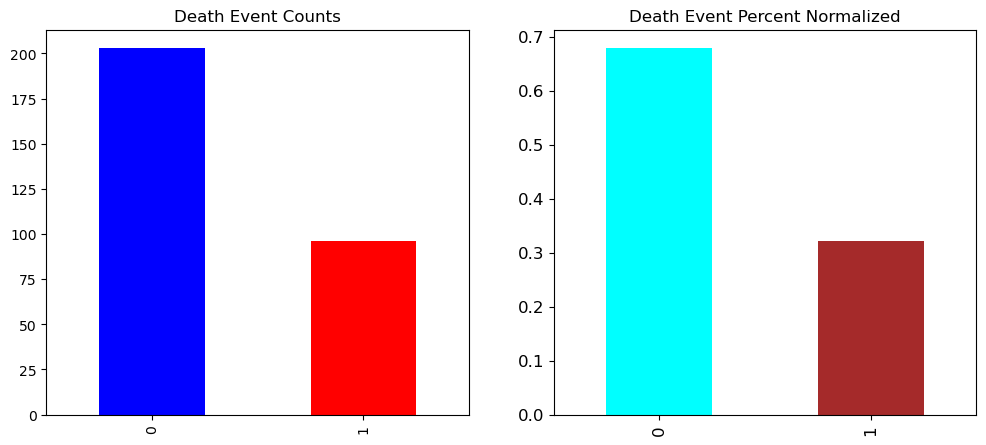

In [10]:
fig , axes = plt.subplots(1,2,figsize=(12,5))

df["DEATH_EVENT"].value_counts().plot(kind="bar" , color=["blue","red"] , ax=axes[0],
                                title="Death Event Counts", fontsize=10 )
df["DEATH_EVENT"].value_counts(normalize=True).plot(kind="bar" , color=["cyan","brown"] , ax=axes[1],
                         title="Death Event Percent Normalized" , fontsize=12 )

informasi tentang setiap predictive feature

Text(0.5, 1.0, 'Age distribution, but hue=DEATH_EVENT')

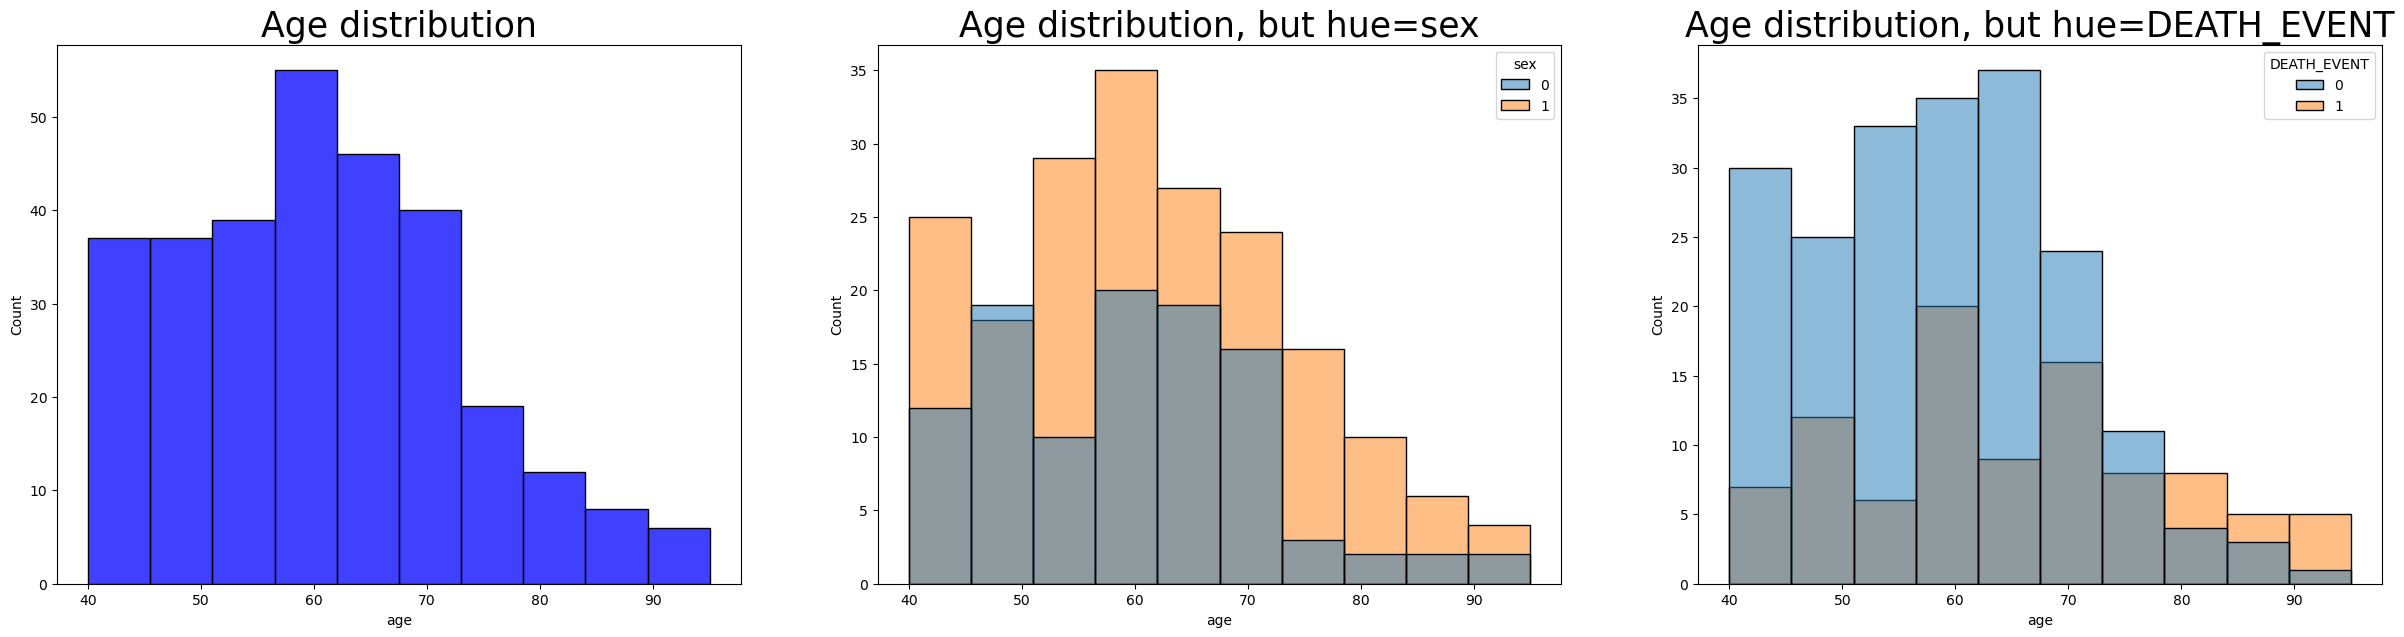

In [11]:
fig , axes = plt.subplots(1,3, figsize=(30,7))
# ---------------------------------------------
sns.histplot(data=df , x="age" , ax=axes[0] , bins="auto", color="blue")
axes[0].set_title("Age distribution" , fontsize=25)
# ---------------------------------------------
sns.histplot(data=df , x="age", ax=axes[1] , bins="auto" , hue="sex")
axes[1].set_title("Age distribution, but hue=sex" , fontsize=25)
# ---------------------------------------------
sns.histplot(data=df , x="age" , ax=axes[2] , bins="auto" , hue="DEATH_EVENT")
axes[2].set_title("Age distribution, but hue=DEATH_EVENT" , fontsize=25)

Pasien kanker payudara paling banyak berusia antara 50 hingga 60 tahun.
Pasien kanker payudara perempuan lebih banyak dibandingkan laki-laki.
Pasien kanker payudara yang meninggal cenderung lebih tua dibandingkan pasien kanker payudara yang selamat.

In [12]:
# Mendefinisikan fitur numerik / memisahkan fitur prediktif numerik dan kategorikal

numeric_features = [
                    "age",
                    "creatinine_phosphokinase",
                    "ejection_fraction",
                    "platelets",
                    "serum_creatinine",
                    "serum_sodium",
                    "time"
                   ]

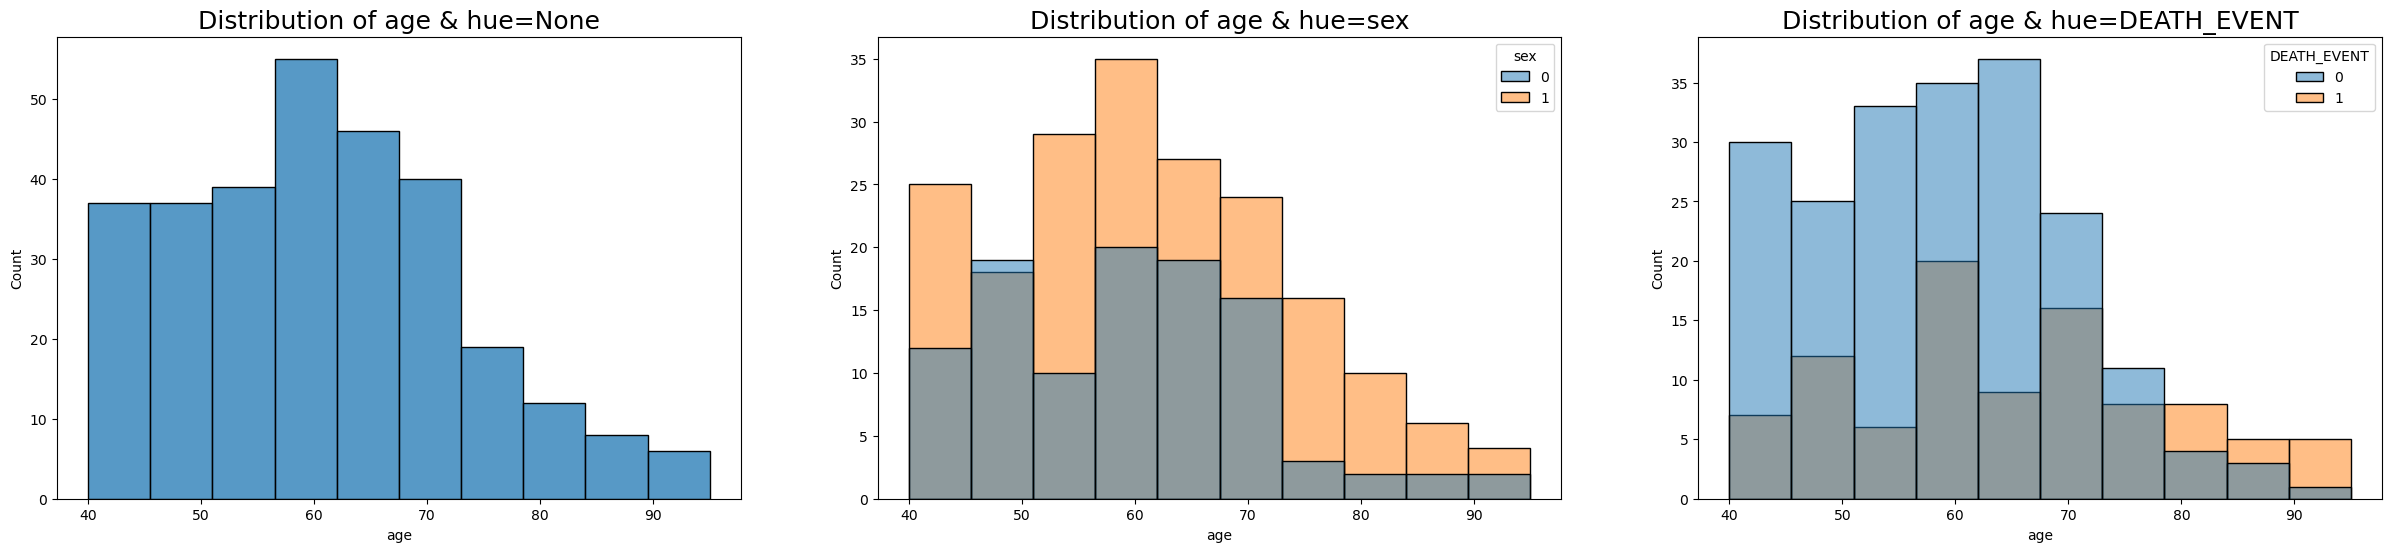

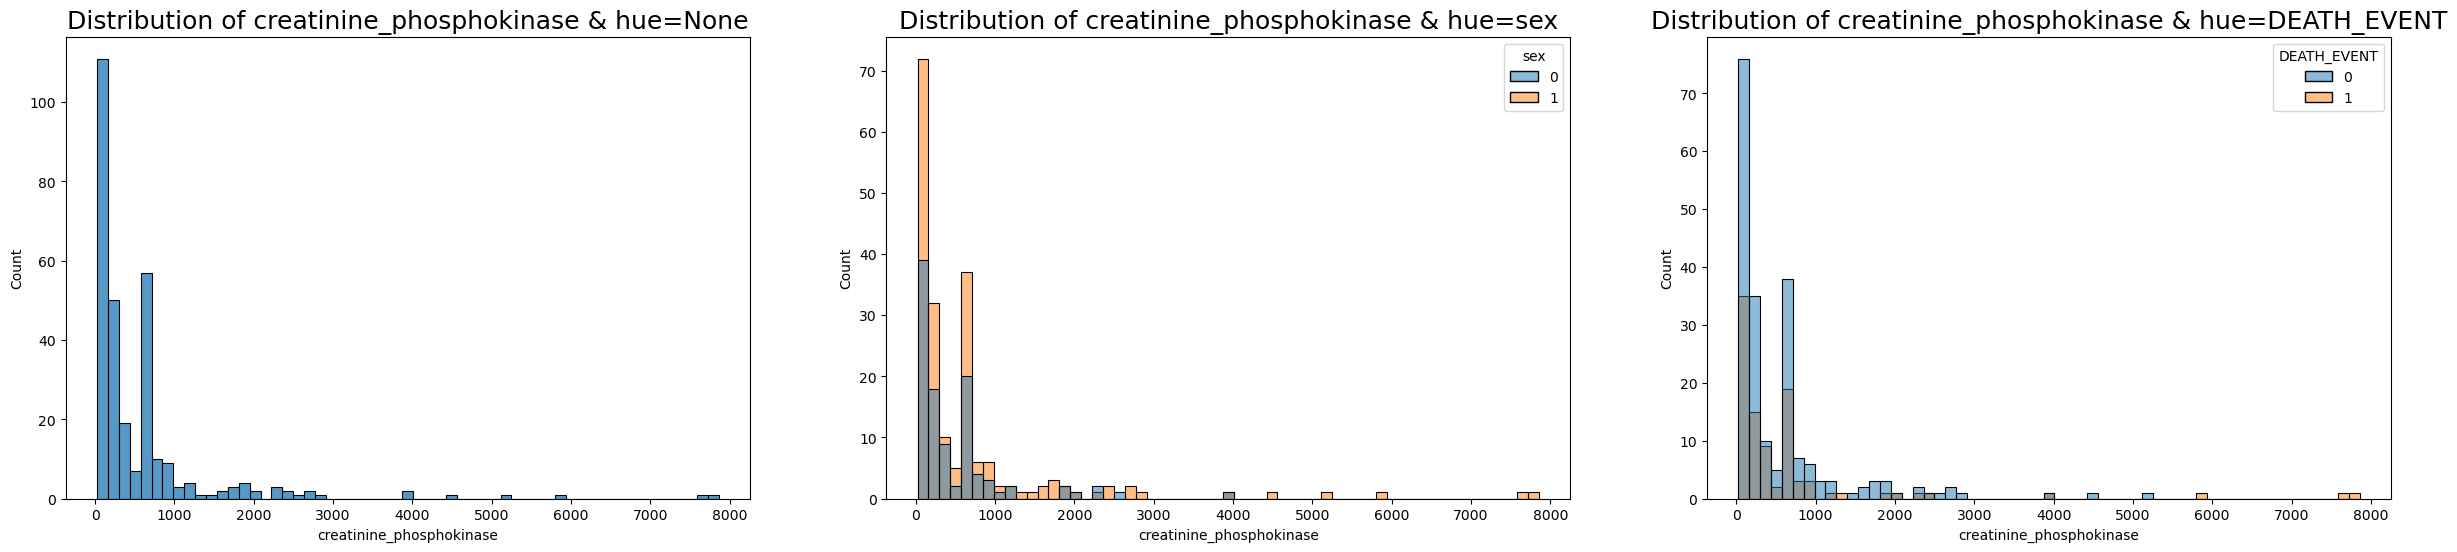

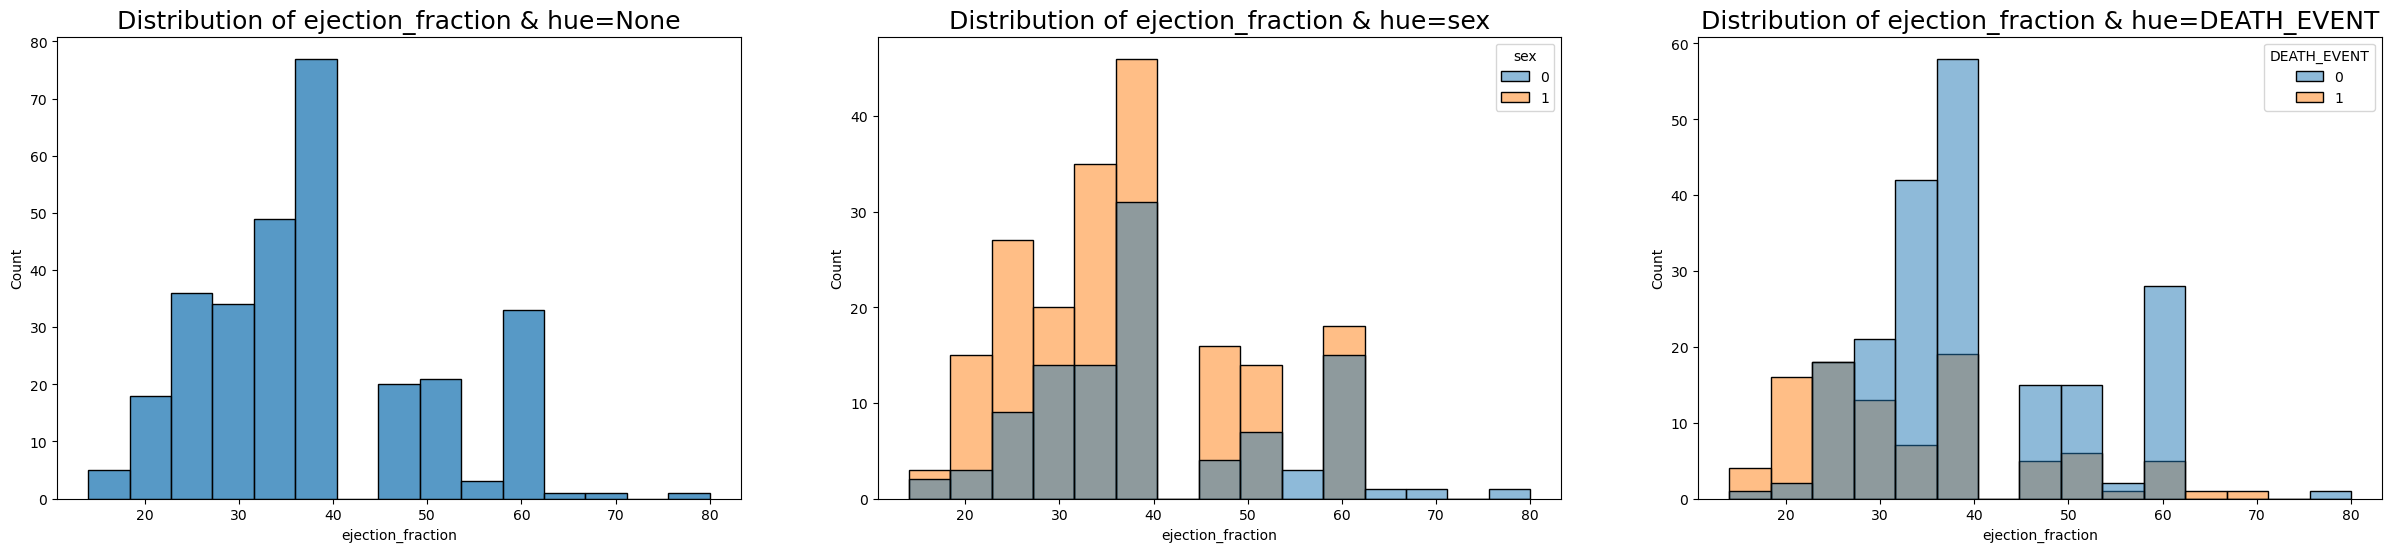

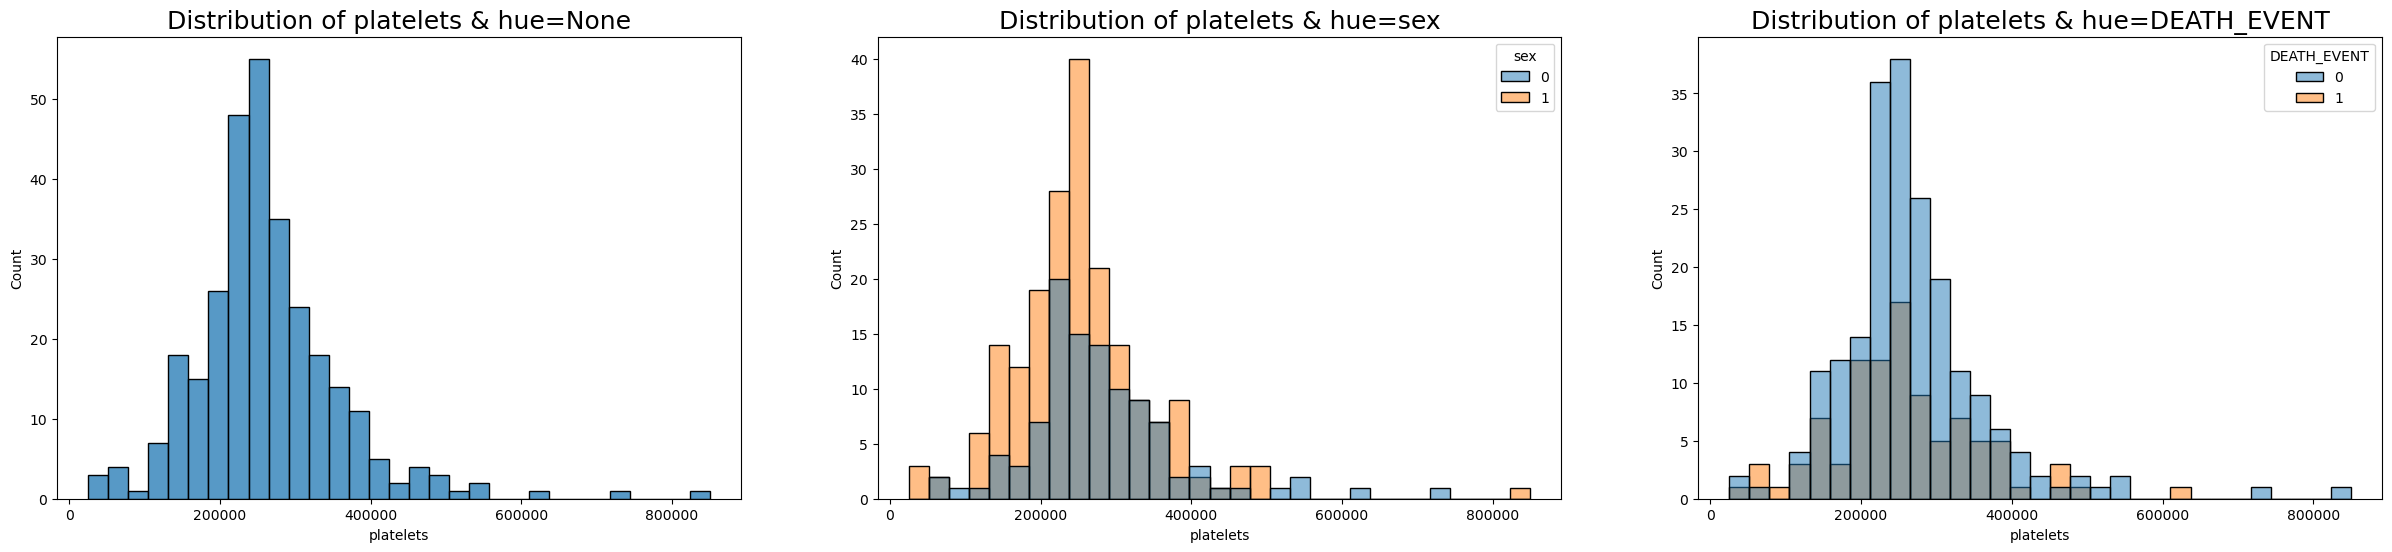

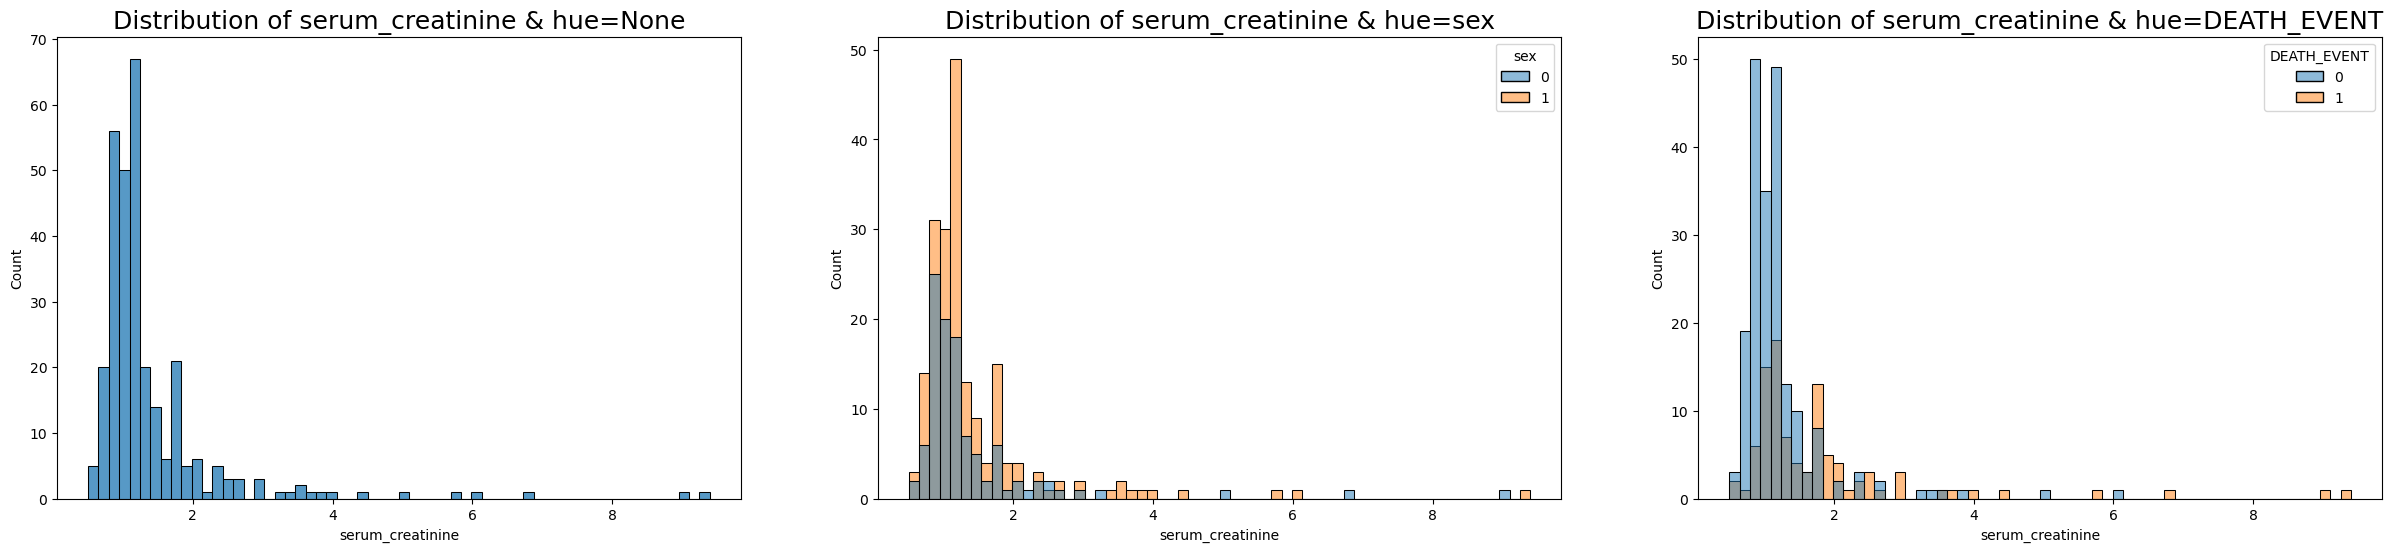

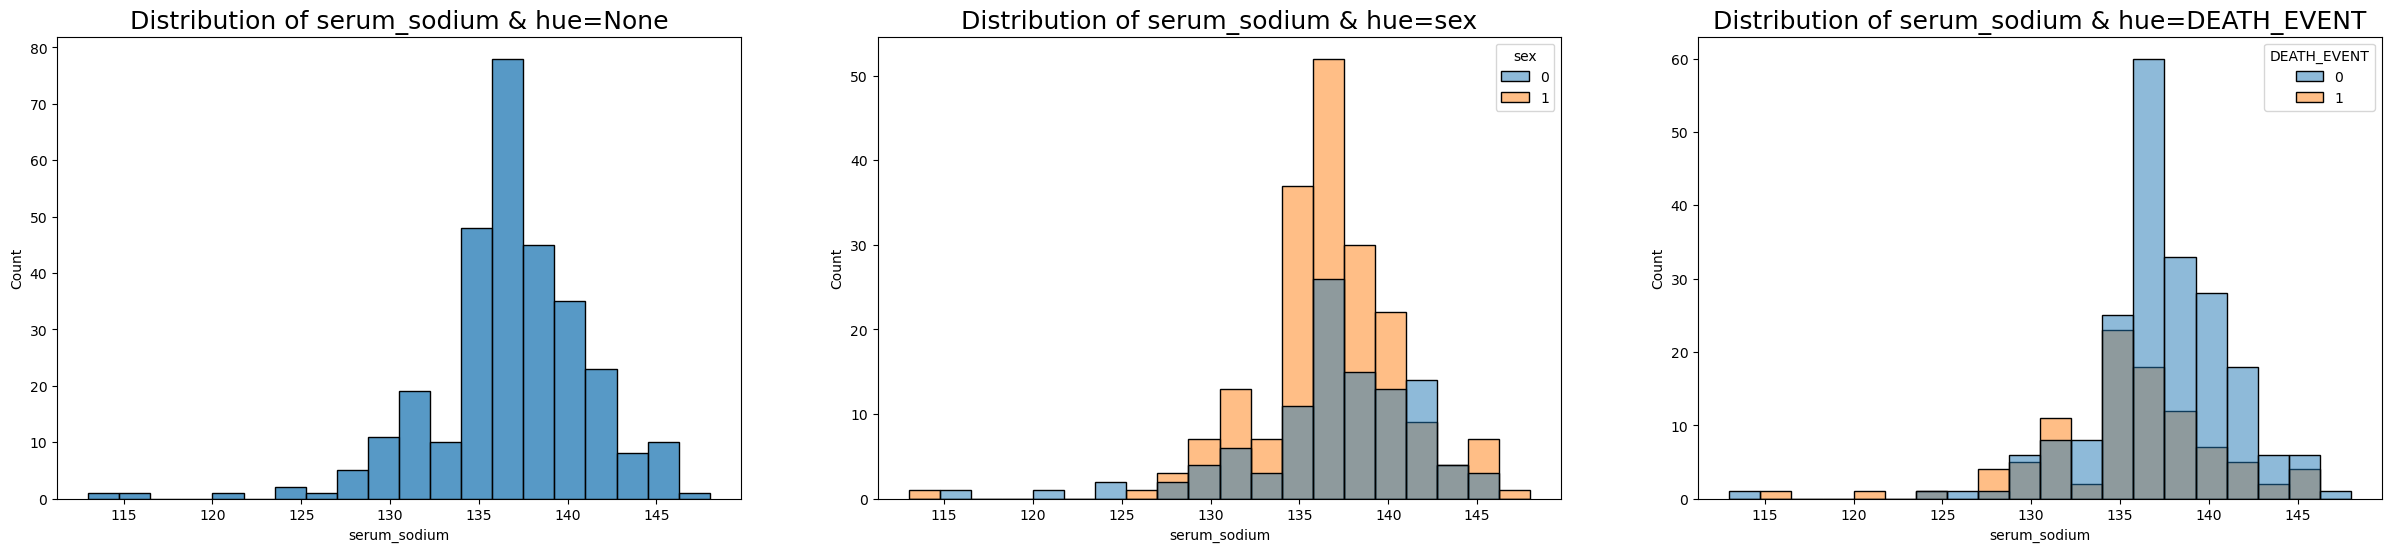

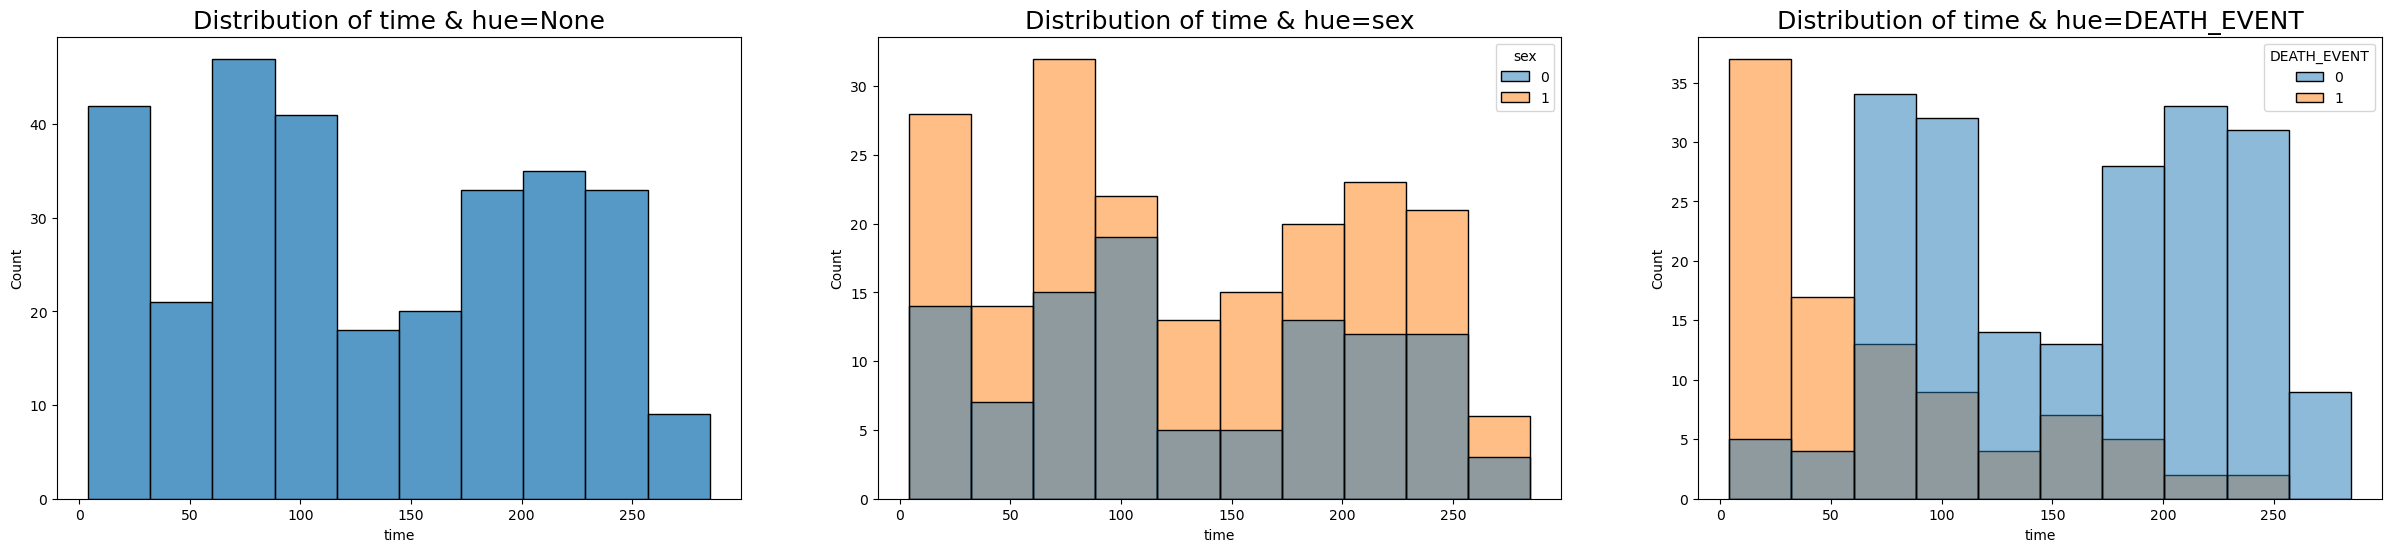

In [13]:
# Membuat proses menggambar grafik otomatis menggunakan "for" loop.

hue = {0:None , 1:"sex" , 2:"DEATH_EVENT"}
for i in numeric_features:
    fig , axes = plt.subplots(1,3,figsize=(30,6))
    for j in range(3):
        sns.histplot( data=df , x=i , bins="auto" , ax=axes[j] , hue=hue[j] )
        axes[j].set_title( f"Distribution of {i} & hue={hue[j]}" , fontsize=18 )

hue menyimpan nilai "sex" dan "DEATH_EVENT" untuk masing-masing indeks 0, 1, dan 2.
Digunakan untuk menentukan warna atau perbedaan visual dalam histogram berdasarkan nilai.
"sex" untuk membedakan berdasarkan jenis kelamin, dan "DEATH_EVENT" untuk membedakan berdasarkan status kematian.

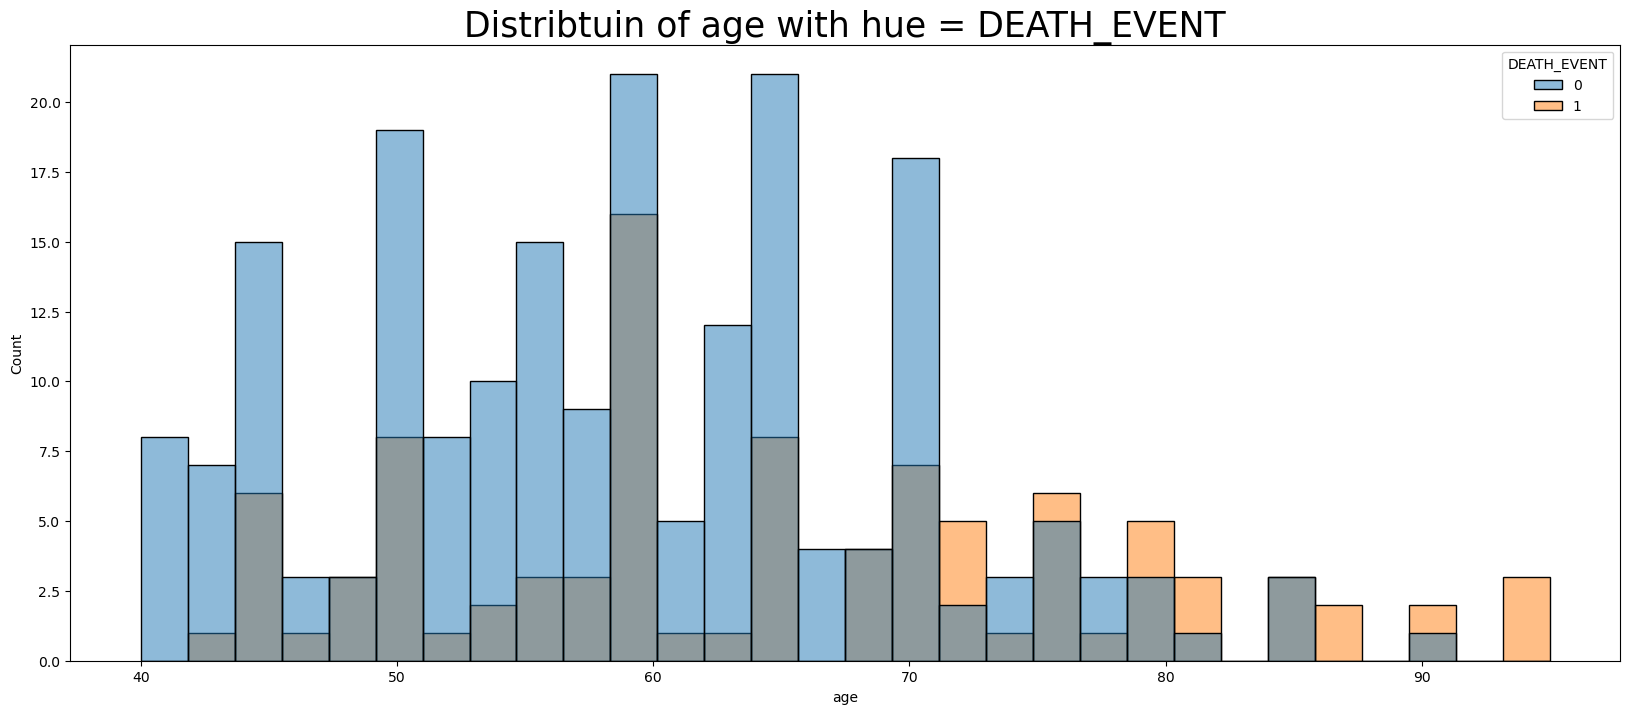

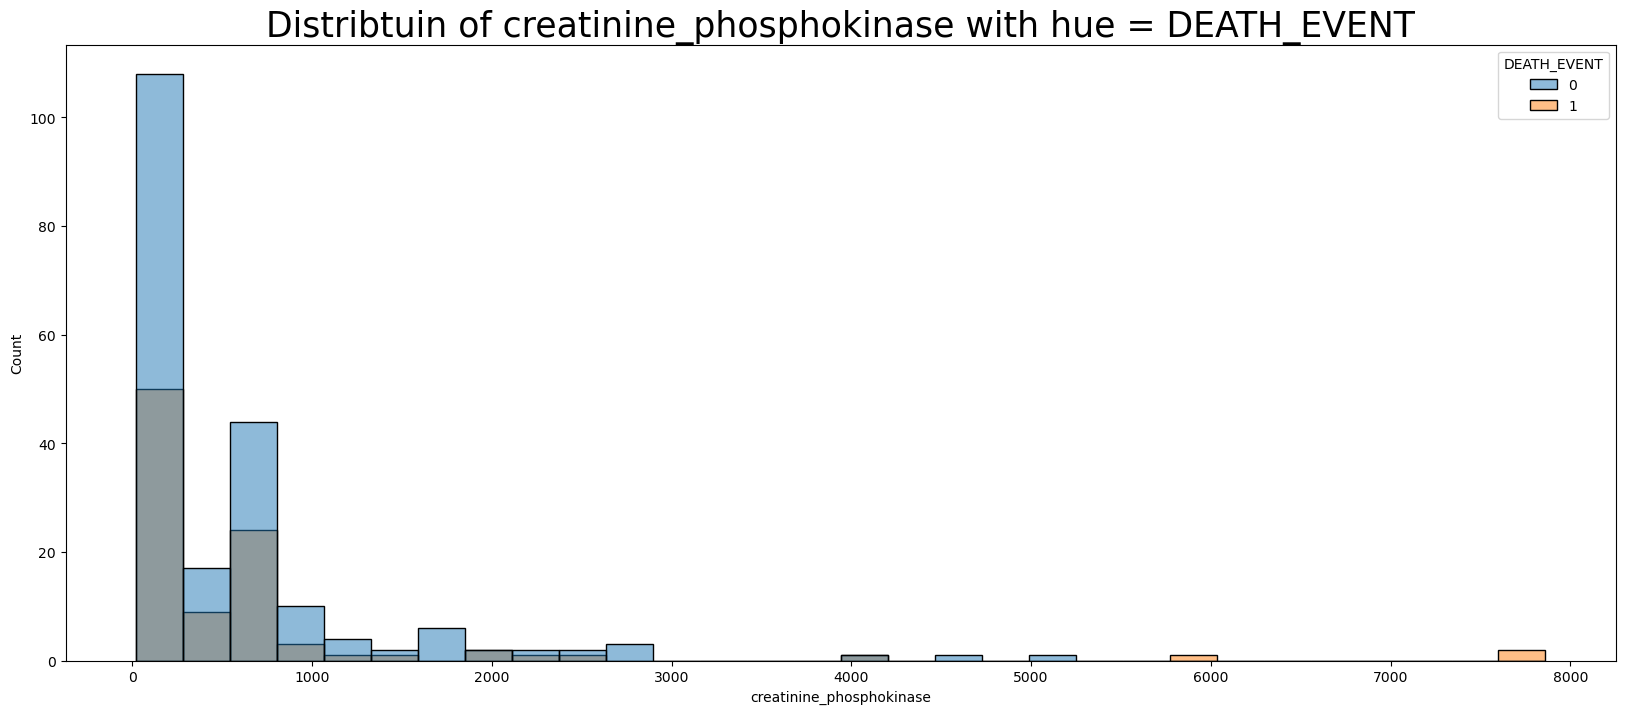

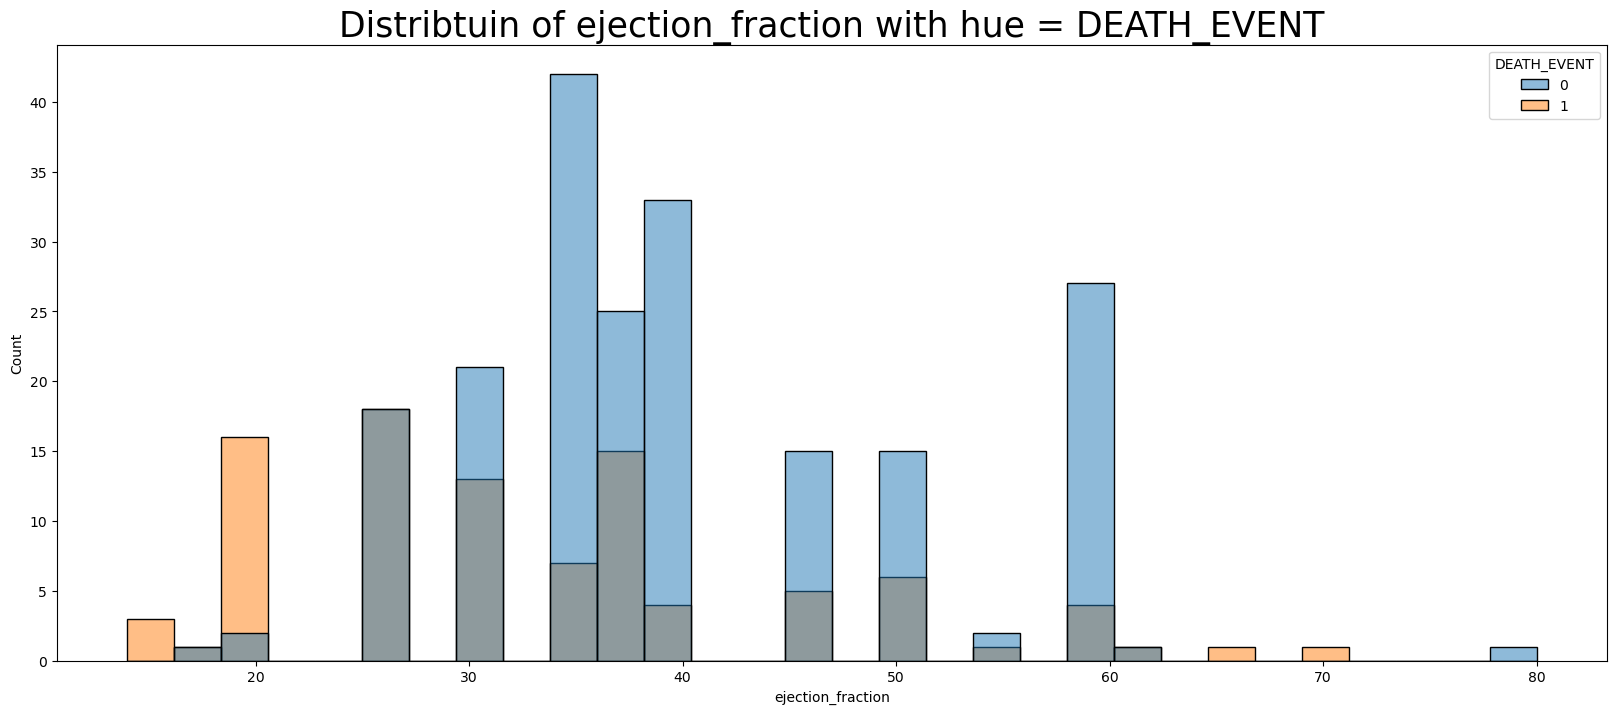

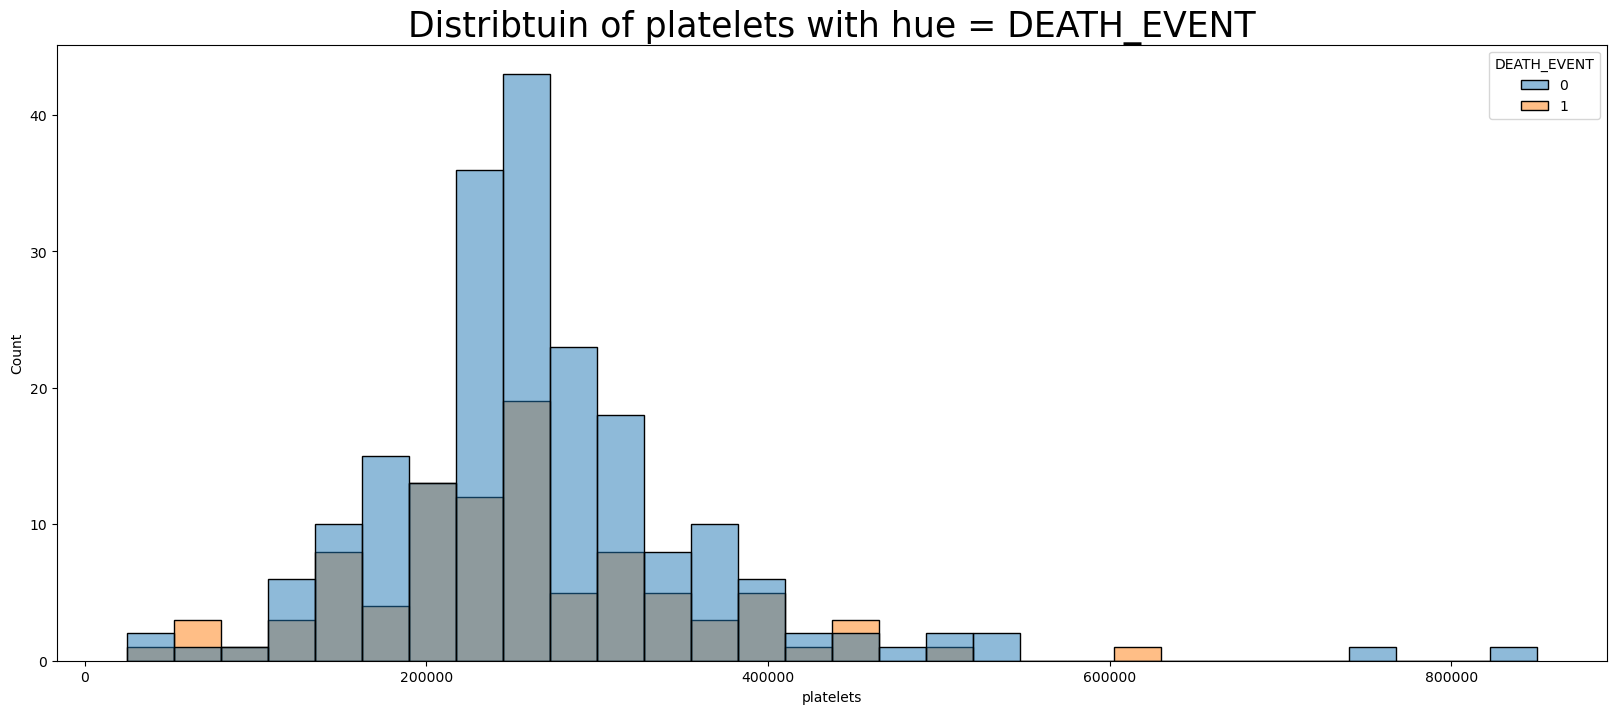

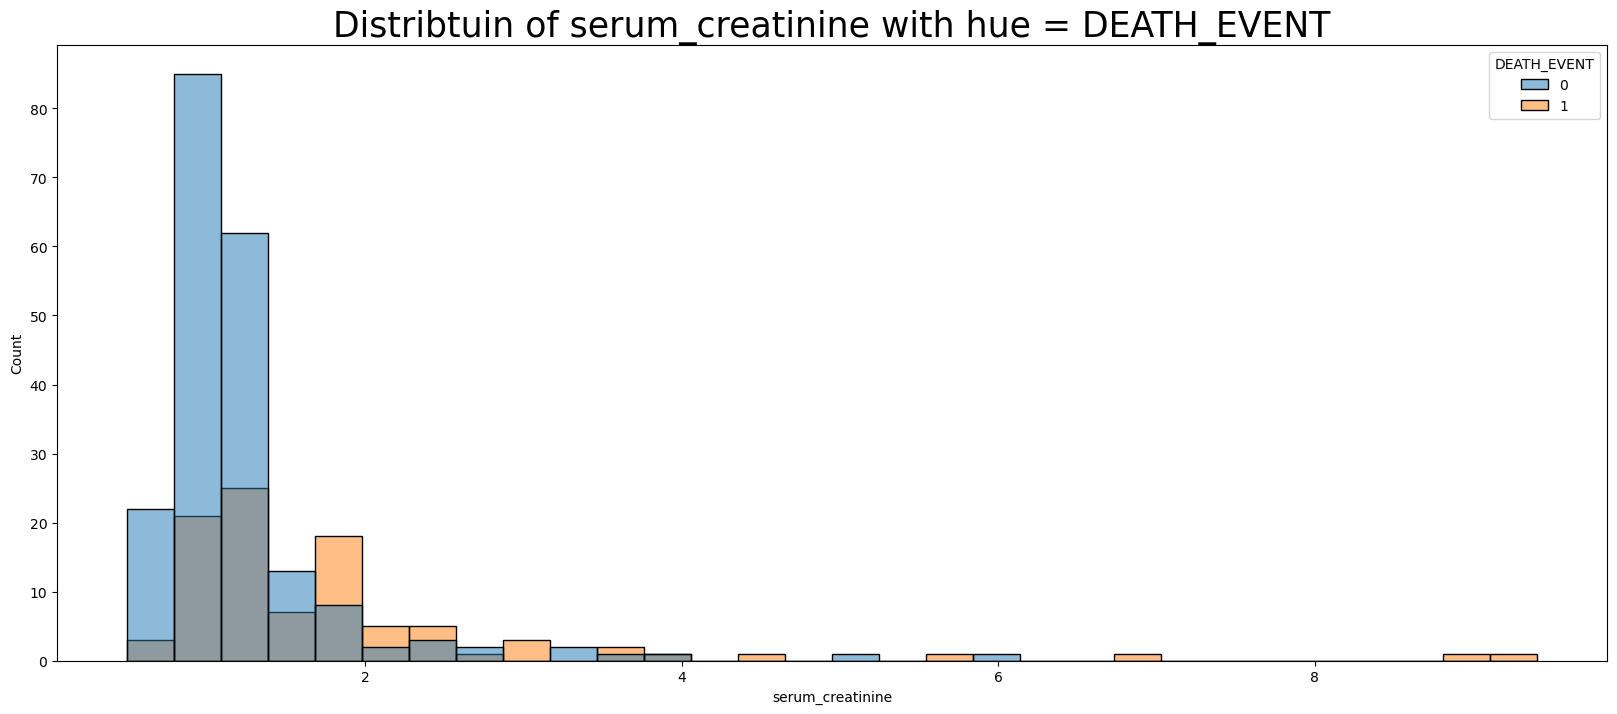

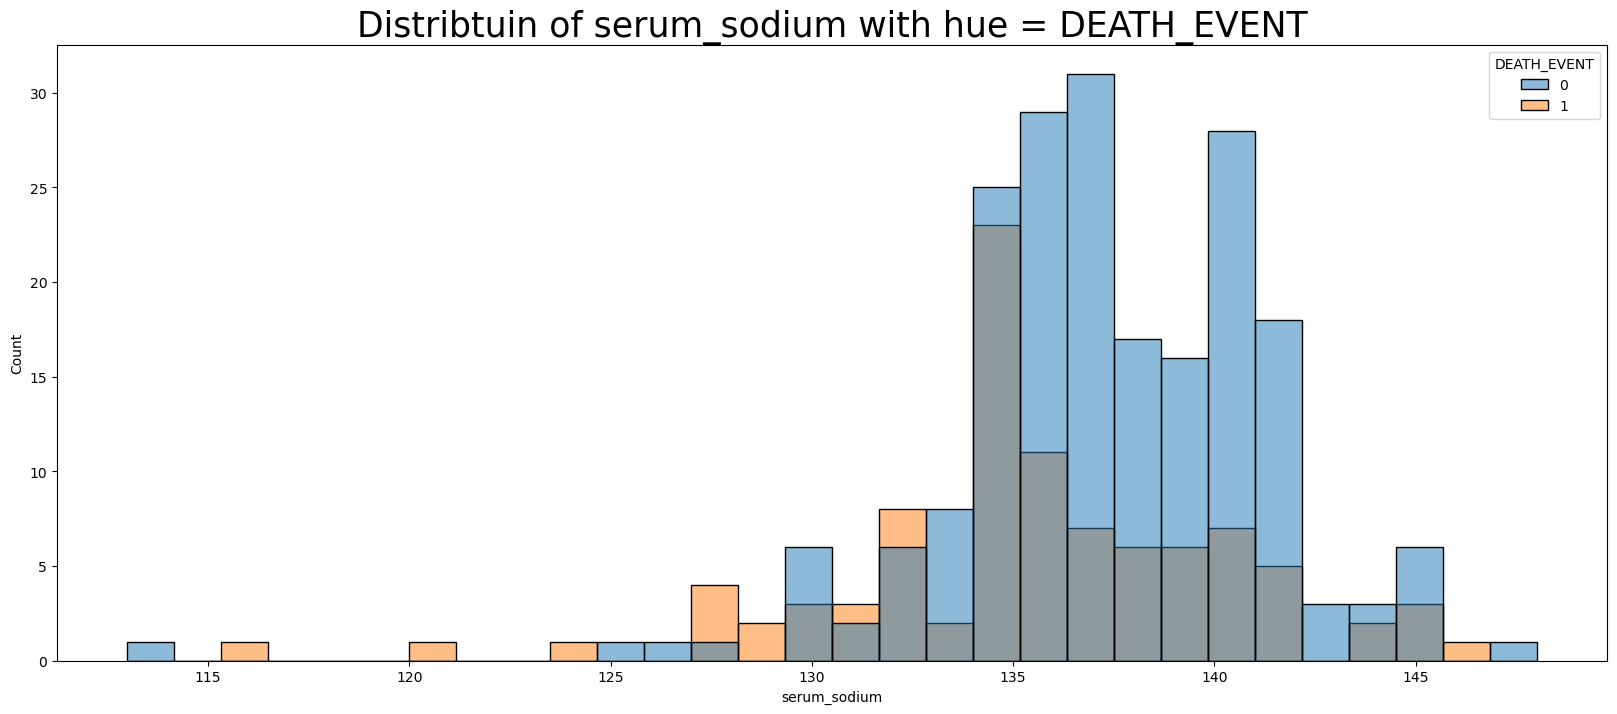

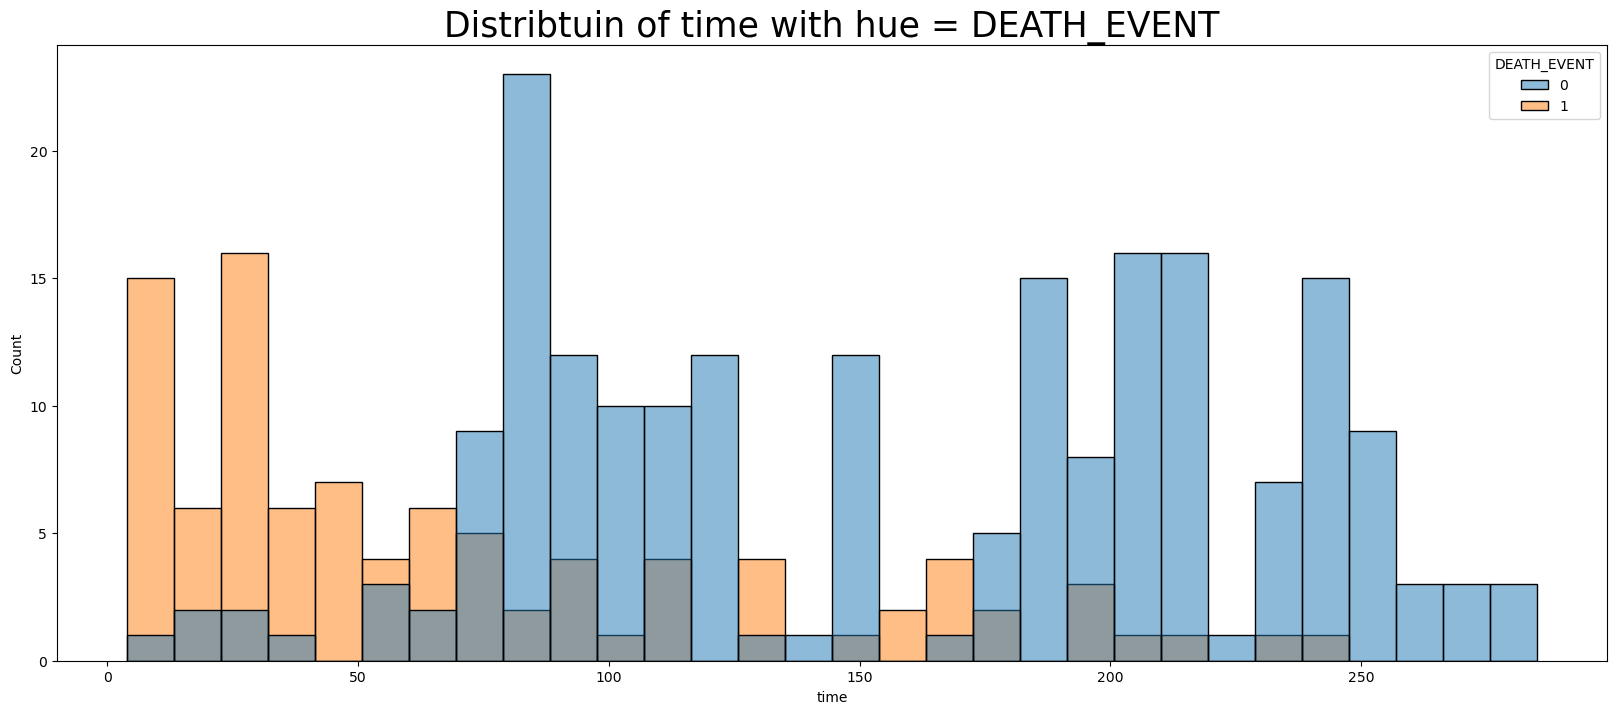

In [14]:
# Pertimbangkan variabel target yaitu "DEATH_EVENT" dan bagi berdasarkan itu.
# Buat histogram semua variabel numerik dan gunakan "hue" berdasarkan "DEATH_EVENT" untuk variabel tersebut.

for i in numeric_features:
    fig , ax = plt.subplots(figsize=(20,8))
    sns.histplot(ax=ax , data=df , x=i , bins=30 , hue="DEATH_EVENT")          # bins = 30
    ax.set_title(f"Distribtuin of {i} with hue = DEATH_EVENT" , fontsize=25 )

Menelusuri setiap fitur numerik dalam daftar numeric_features

In [15]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


Text(0.5, 1.0, 'This is Heatmap for showing the Correlations')

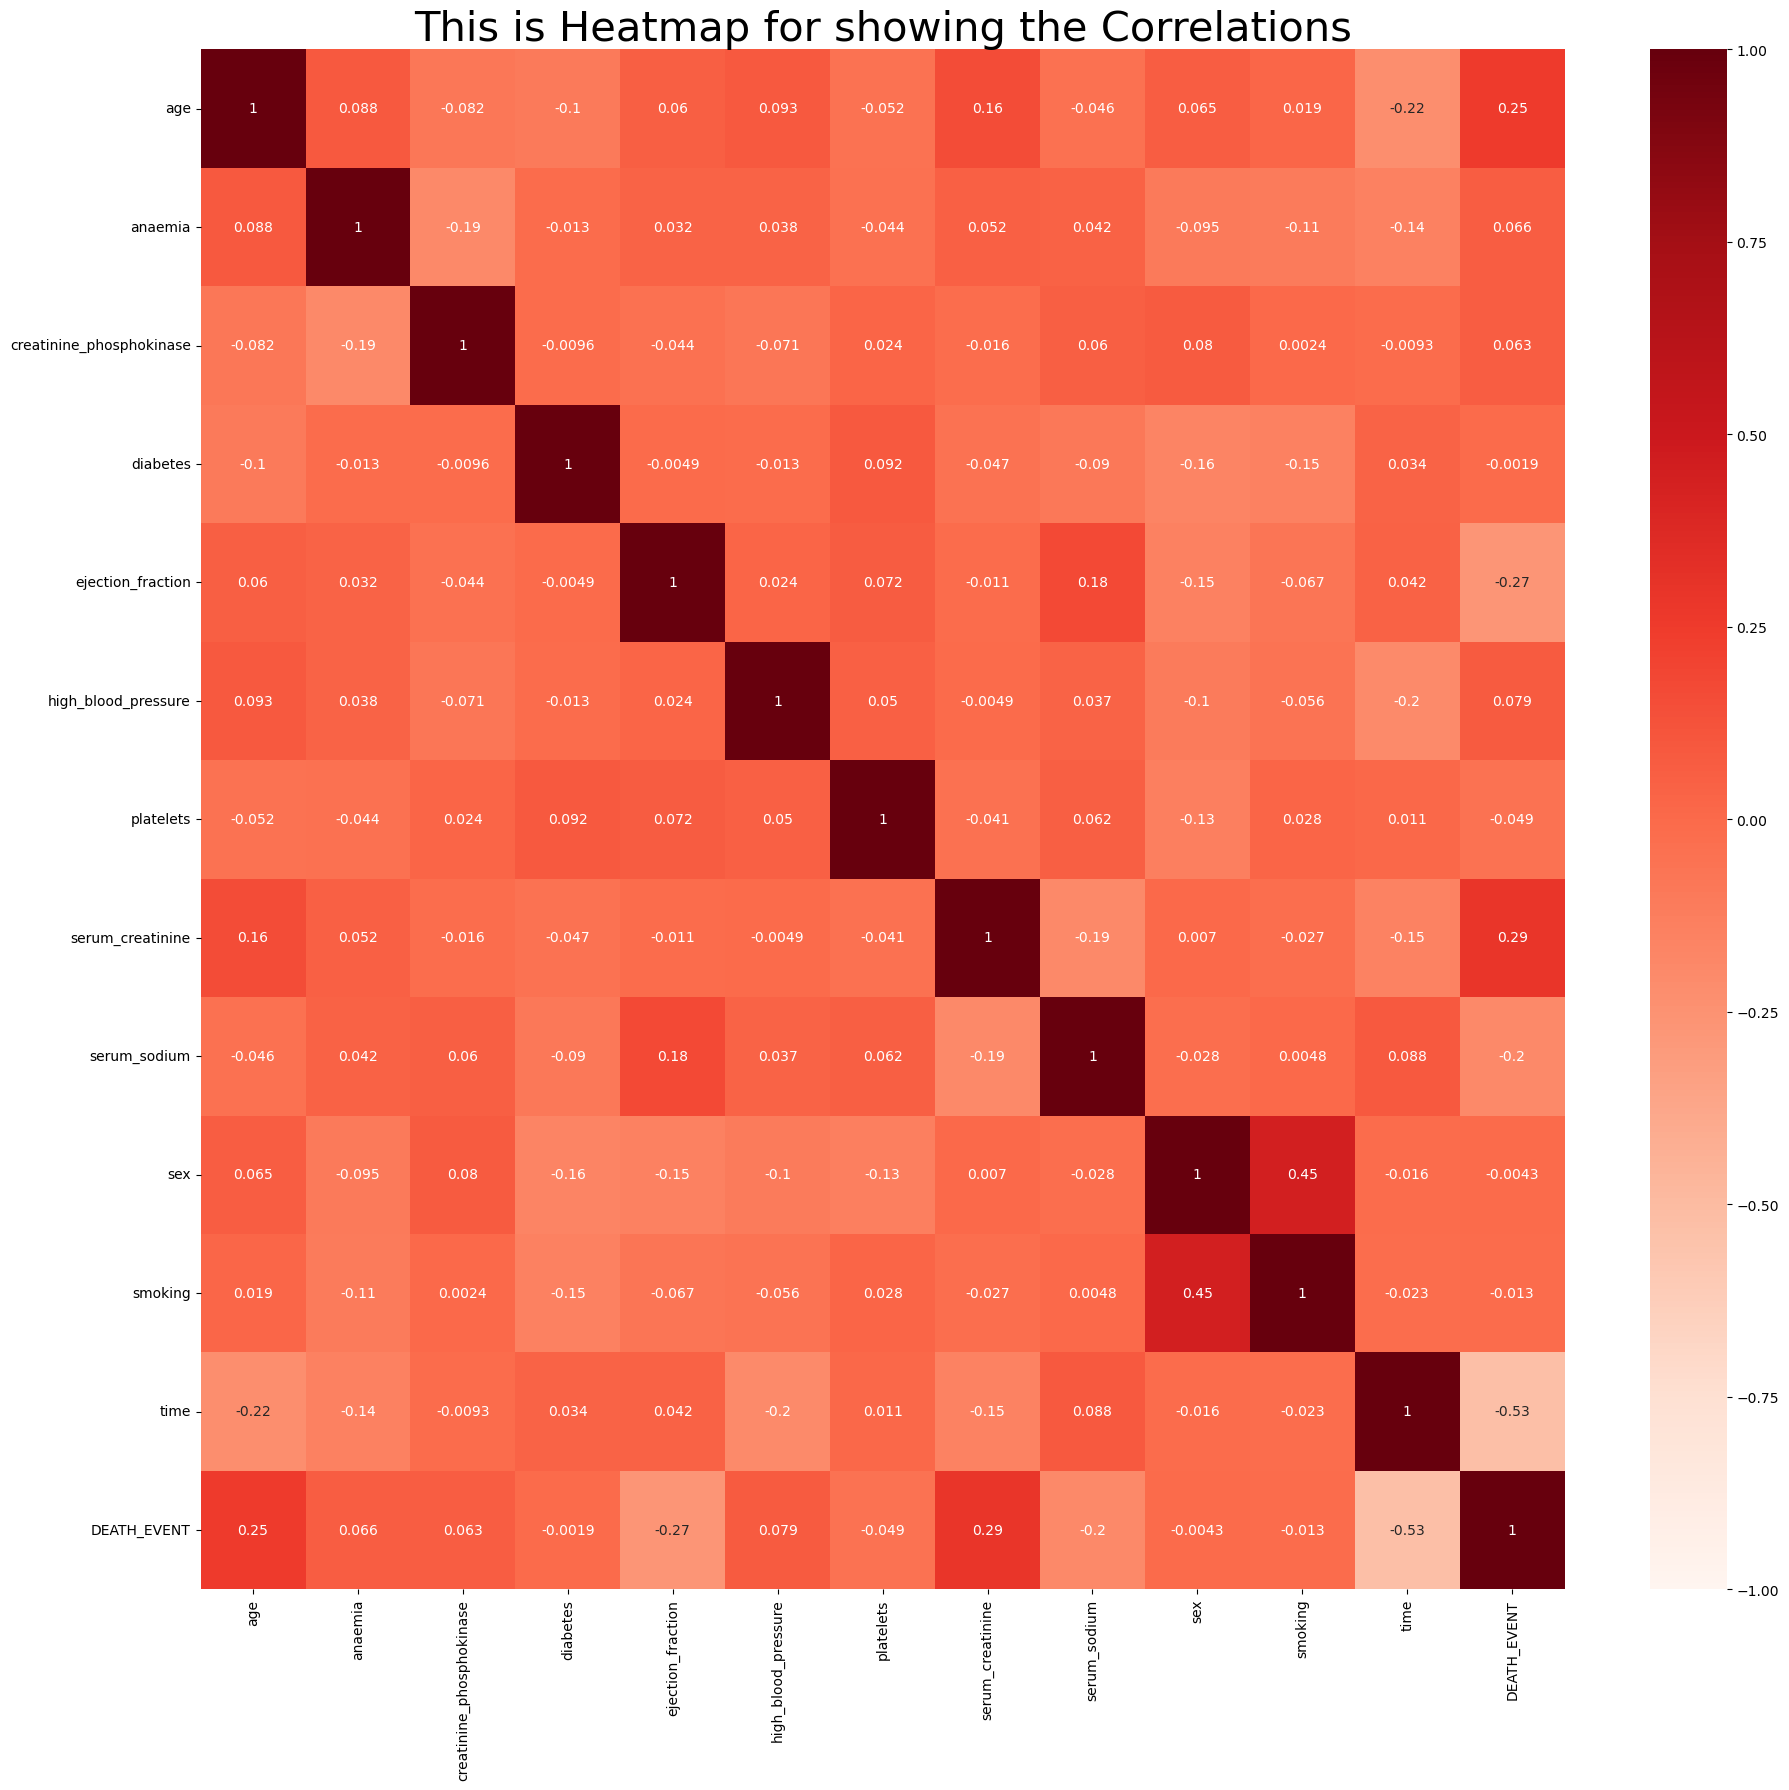

In [16]:
fig , ax = plt.subplots(figsize=(22,20))
sns.heatmap(ax=ax , data=df.corr() , vmin=-1 , vmax=1 , annot=True , cmap="Reds")
ax.set_title("This is Heatmap for showing the Correlations" , fontsize=30)

In [17]:
# Mengekstraksi fitur yang sangat berkorelasi

all_corr = df.corr()     # Korelasi semua elemen satu sama lain (dataframe)
DEATH_EVENT_corr = all_corr["DEATH_EVENT"]     # Korelasi semua elemen dengan DEATH EVENT(series)
DEATH_EVENT_corr[ np.abs(DEATH_EVENT_corr) > 0.1 ]     # limit=0.1 -> lebih besar disebut berkorelasi tinggi

# Limit 0,1, artinya fitur yang memiliki korelasi lebih besar dari 0,1 dengan target disebut sangat berkorelasi

age                  0.253729
ejection_fraction   -0.268603
serum_creatinine     0.294278
serum_sodium        -0.195204
time                -0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

# Data Preprocessing

In [18]:
X = df.drop(["DEATH_EVENT"] , axis=1)
X = np.array(X)
X

array([[7.500e+01, 0.000e+00, 5.820e+02, ..., 1.000e+00, 0.000e+00,
        4.000e+00],
       [5.500e+01, 0.000e+00, 7.861e+03, ..., 1.000e+00, 0.000e+00,
        6.000e+00],
       [6.500e+01, 0.000e+00, 1.460e+02, ..., 1.000e+00, 1.000e+00,
        7.000e+00],
       ...,
       [4.500e+01, 0.000e+00, 2.060e+03, ..., 0.000e+00, 0.000e+00,
        2.780e+02],
       [4.500e+01, 0.000e+00, 2.413e+03, ..., 1.000e+00, 1.000e+00,
        2.800e+02],
       [5.000e+01, 0.000e+00, 1.960e+02, ..., 1.000e+00, 1.000e+00,
        2.850e+02]])

In [19]:
y = df["DEATH_EVENT"]
y = np.array(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtyp

In [20]:
print("X.shape is : " , X.shape )
print("Y.shape is : " , y.shape )

X.shape is :  (299, 12)
Y.shape is :  (299,)


In [21]:
X.min(axis=0)

array([4.00e+01, 0.00e+00, 2.30e+01, 0.00e+00, 1.40e+01, 0.00e+00,
       2.51e+04, 5.00e-01, 1.13e+02, 0.00e+00, 0.00e+00, 4.00e+00])

In [22]:
min_of_data_for_each_feature = X.min(axis=0)
range_of_data_for_each_feature = (X - X.min(axis=0)).max(axis=0)
range_of_data_for_each_feature

array([5.500e+01, 1.000e+00, 7.838e+03, 1.000e+00, 6.600e+01, 1.000e+00,
       8.249e+05, 8.900e+00, 3.500e+01, 1.000e+00, 1.000e+00, 2.810e+02])

In [23]:
X_scaled = (X - min_of_data_for_each_feature) / range_of_data_for_each_feature
X_scaled

array([[0.63636364, 0.        , 0.07131921, ..., 1.        , 0.        ,
        0.        ],
       [0.27272727, 0.        , 1.        , ..., 1.        , 0.        ,
        0.00711744],
       [0.45454545, 0.        , 0.01569278, ..., 1.        , 1.        ,
        0.01067616],
       ...,
       [0.09090909, 0.        , 0.25988773, ..., 0.        , 0.        ,
        0.97508897],
       [0.09090909, 0.        , 0.30492473, ..., 1.        , 1.        ,
        0.98220641],
       [0.18181818, 0.        , 0.02207196, ..., 1.        , 1.        ,
        1.        ]])

In [24]:
print("Minimum of data on each feature for X_scaled is: " , np.min(X_scaled , axis=0) )
print(" & ")
print("Maximum of data on each feature for X_scaled is: " , np.max(X_scaled , axis=0) )

Minimum of data on each feature for X_scaled is:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 & 
Maximum of data on each feature for X_scaled is:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# Pendefinisian Model

### Logistic Regression

Logistic Regression adalah metode statistik yang digunakan untuk membangun model pembelajaran mesin yang variabel terikatnya bersifat dikotomis: yaitu biner. Logistic Regression digunakan untuk menggambarkan data dan hubungan antara satu variabel terikat dengan satu atau lebih variabel bebas. Variabel bebasnya dapat bertipe nominal, ordinal, atau interval.

Nama “Logistic Regression” diambil dari konsep fungsi logistik yang digunakannya. Fungsi logistik disebut juga fungsi sigmoid. Nilai fungsi logistik ini terletak antara nol dan satu.

### K-Nearest Neighbors

Algoritma k-nearest neighbours (KNN) adalah metode klasifikasi data untuk memperkirakan kemungkinan suatu titik data akan menjadi anggota suatu kelompok atau kelompok lain berdasarkan pada kelompok mana titik data yang paling dekat dengannya berada.

Algoritme k-nearest neighbour adalah jenis algoritma pembelajaran mesin terawasi yang digunakan untuk menyelesaikan masalah klasifikasi dan regresi.

Ini disebut algoritma pembelajaran yang malas atau pembelajar yang malas karena tidak melakukan pelatihan apa pun saat Anda memberikan data pelatihan. Sebaliknya, ia hanya menyimpan data selama waktu pelatihan dan tidak melakukan penghitungan apa pun. Itu tidak membangun model sampai kueri dilakukan pada kumpulan data. Hal ini membuat KNN ideal untuk penambangan data.

### Support Vector Machine

Support Vector Machine (SVM) adalah salah satu algoritma Supervised Learning yang paling populer, yang digunakan untuk masalah Klasifikasi dan Regresi.

Tujuan dari algoritma SVM adalah untuk menciptakan garis atau batas keputusan terbaik yang dapat memisahkan ruang berdimensi n ke dalam kelas-kelas sehingga kita dapat dengan mudah menempatkan titik data baru dalam kategori yang benar di masa depan. Batasan keputusan terbaik ini disebut hyperplane.

SVM memilih titik/vektor ekstrim yang membantu dalam pembuatan hyperplane. Kasus ekstrim ini disebut sebagai vektor pendukung, dan oleh karena itu algoritma disebut sebagai Mesin Vektor Dukungan.

### Decision Tree

Decision Tree adalah teknik Supervised learning yang dapat digunakan untuk masalah klasifikasi dan Regresi, namun sebagian besar lebih disukai untuk menyelesaikan masalah Klasifikasi. Ini adalah pengklasifikasi terstruktur pohon, di mana node internal mewakili fitur kumpulan data, cabang mewakili aturan keputusan, dan setiap node daun mewakili hasilnya.

Dalam Decision Tree terdapat dua node, yaitu Node Decision dan Node Tree. Node decision digunakan untuk membuat keputusan apa pun dan memiliki banyak cabang, sedangkan node tree adalah keluaran dari keputusan tersebut dan tidak berisi cabang lebih lanjut.

### Random Forest

Random Forest adalah algoritma pembelajaran mesin berbasis pohon yang memanfaatkan kekuatan beberapa pohon keputusan untuk mengambil keputusan. Setiap pohon di hutan acak mengeluarkan prediksi kelas dan kelas dengan suara terbanyak menjadi prediksi model kami. Sejumlah besar model (pohon) yang relatif tidak berkorelasi yang beroperasi sebagai sebuah komite akan mengungguli model konstituen mana pun.

### Naive Bayes

Pengklasifikasi Naive Bayes didasarkan pada Teorema Bayes, dimana salah satu asumsi yang diambil adalah asumsi independensi yang kuat antar fitur. Pengklasifikasi ini berasumsi bahwa nilai suatu fitur tertentu tidak bergantung pada nilai fitur lainnya. Dalam situasi pembelajaran yang diawasi, Pengklasifikasi Naive Bayes dilatih dengan sangat efisien. Pengklasifikasi Naive Bayes memerlukan sedikit data pelatihan untuk memperkirakan parameter yang diperlukan untuk klasifikasi. Pengklasifikasi Naive Bayes memiliki desain dan implementasi yang sederhana dan dapat diterapkan pada banyak situasi kehidupan nyata.

Gaussian Naive Bayes merupakan varian dari Naive Bayes yang mengikuti distribusi normal Gaussian dan mendukung data kontinu. Saat bekerja dengan data kontinu, asumsi yang sering diambil adalah bahwa nilai kontinu yang terkait dengan setiap kelas terdistribusi menurut distribusi normal (atau Gaussian).

### Confusion Matrix

Confusion matrix adalah sebuah tabel yang sering digunakan untuk mengukur kinerja dari model klasifikasi di machine learning. Tabel ini menggambarkan lebih detail tentang jumlah data yang diklasifikasikan dengan benar maupun salah.

Confusion matrix adalah salah satu tools analitik prediktif yang  menampilkan dan membandingkan nilai aktual atau nilai sebenarnya dengan nilai hasil prediksi model yang dapat digunakan untuk menghasilkan metrik evaluasi seperti Accuracy (akurasi), Precision, Recall, dan F1-Score atau F-Measure.

# Pelatihan Model

### Logistic Regression

In [25]:
logestic_reg = LogisticRegression(C=1)

In [26]:
X_train , X_test , y_train , y_test = train_test_split(X_scaled , y , random_state=0 )

In [27]:
print(f"X_scaled.shape is: {X.shape}  while X_train.shape is: {X_train.shape} and X_test.shape is: {X_test.shape}" )
print("----------------------------------------------------------------------------------------------------")
print(f"y.shape is: {y.shape}  while y_train.shape is: {y_train.shape} and y_test.shape is: {y_test.shape}" )

X_scaled.shape is: (299, 12)  while X_train.shape is: (224, 12) and X_test.shape is: (75, 12)
----------------------------------------------------------------------------------------------------
y.shape is: (299,)  while y_train.shape is: (224,) and y_test.shape is: (75,)


In [28]:
logestic_reg.fit(X_train , y_train)
print(f"Logestic Regression Train Score for random_state=0 and c=1 is: {logestic_reg.score(X_train,y_train)}" )
print(f"Logestic Regression Test Score for random_state=0 and c=1 is: {logestic_reg.score(X_test,y_test)}" )

Logestic Regression Train Score for random_state=0 and c=1 is: 0.8526785714285714
Logestic Regression Test Score for random_state=0 and c=1 is: 0.7733333333333333


With random_state=0 & C=0.0001, Logistic Regression Train Accuracy is: 0.6919642857142857
With random_state=0 & C=0.0001, Logistic Regression Test Accuracy is: 0.64
-------------------------------------------------------------------------------------------------
With random_state=0 & C=0.001, Logistic Regression Train Accuracy is: 0.6919642857142857
With random_state=0 & C=0.001, Logistic Regression Test Accuracy is: 0.64
-------------------------------------------------------------------------------------------------
With random_state=0 & C=0.01, Logistic Regression Train Accuracy is: 0.6919642857142857
With random_state=0 & C=0.01, Logistic Regression Test Accuracy is: 0.64
-------------------------------------------------------------------------------------------------
With random_state=0 & C=0.05, Logistic Regression Train Accuracy is: 0.6919642857142857
With random_state=0 & C=0.05, Logistic Regression Test Accuracy is: 0.64
--------------------------------------------------------

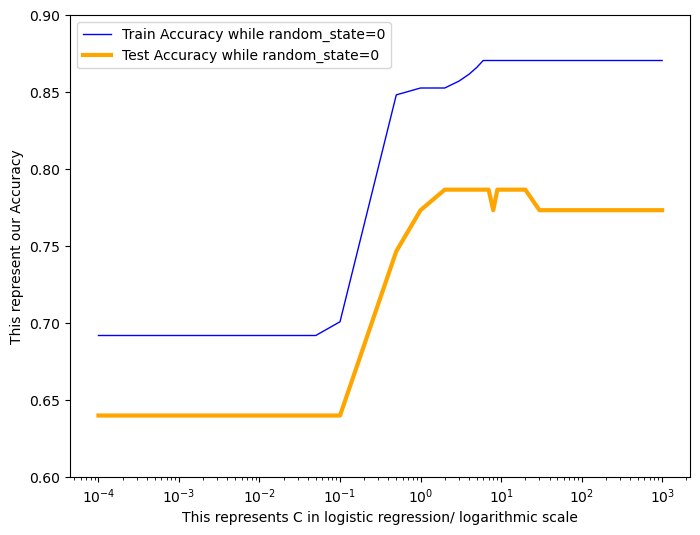

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled , y , random_state=0)
# random_state=0" tidak bagus dan tidak bisa digeneralisasi

different_C = [0.0001,0.001,0.01,0.05,0.1,0.5,1,2,3,4,5
               ,6,7,8,9,10,11,12,13,14,15,20,30,50,75,100,150,200,250,500,1000]

train_score = []
test_score = []

for i in different_C:
    log_reg = LogisticRegression( C=i , solver="lbfgs")
    log_reg.fit(X_train , y_train)
    print(f"With random_state=0 & C={i}, Logistic Regression Train Accuracy is: {log_reg.score(X_train,y_train)}" )
    print(f"With random_state=0 & C={i}, Logistic Regression Test Accuracy is: {log_reg.score(X_test,y_test)}" )
    print("-------------------------------------------------------------------------------------------------")
    train_score.append( log_reg.score(X_train,y_train) )
    test_score.append( log_reg.score(X_test,y_test) )
    
fig , ax = plt.subplots(figsize=(8,6))
ax.plot(different_C , train_score , lw=1 , color="blue" , label="Train Accuracy while random_state=0")
ax.plot(different_C , test_score , lw=3 , color="orange" , label="Test Accuracy while random_state=0")

ax.set_xlabel("This represents C in logistic regression/ logarithmic scale")
ax.set_ylabel("This represent our Accuracy")
ax.set_yticks(np.arange(0.6,0.9,0.05))
ax.legend()
ax.set_xscale("log")

# train score harus terus meningkat
# test score pertama-tama harus meningkat dan kemudian menurun

In [30]:
# Jadikan lebih generalized -> berbagai "C" & berbagai "random_state"

different_random_state = np.arange(1,500)
different_C = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30
                                        ,35,40,45,50,100,1000,10000,100000,1000000]

temp_train_score = []
temp_test_score = []
permanent_train_score = []
permanent_test_score = []

for i in different_C:
    logestic_reg = LogisticRegression( C=i )
    for j in different_random_state:
        X_train,X_test,y_train,y_test = train_test_split(X_scaled , y , random_state=j)
        logestic_reg.fit(X_train , y_train)
        temp_train_score.append(logestic_reg.score(X_train,y_train))
        temp_test_score.append(logestic_reg.score(X_test,y_test))
    mean_of_temp_train_accuracy = sum(temp_train_score)/len(temp_train_score)
    mean_of_temp_test_accuracy = sum(temp_test_score)/len(temp_test_score)
    permanent_train_score.append(mean_of_temp_train_accuracy)
    permanent_test_score.append(mean_of_temp_test_accuracy)
    print(f"With C={i} the average train score of Logistic Regression is: ", mean_of_temp_train_accuracy)
    print(f"With C={i} the average test score of Logistic Regression is: ", mean_of_temp_test_accuracy)
    print("-----------------------------------------------------------------------------------------")
    temp_train_score = []
    temp_test_score = []

With C=0.1 the average train score of Logistic Regression is:  0.7003471228170622
With C=0.1 the average test score of Logistic Regression is:  0.6915965263861059
-----------------------------------------------------------------------------------------
With C=0.2 the average train score of Logistic Regression is:  0.7605747208703116
With C=0.2 the average test score of Logistic Regression is:  0.7400935203740815
-----------------------------------------------------------------------------------------
With C=0.3 the average train score of Logistic Regression is:  0.7960027197251646
With C=0.3 the average test score of Logistic Regression is:  0.7700734802939219
-----------------------------------------------------------------------------------------
With C=0.4 the average train score of Logistic Regression is:  0.8157386200973376
With C=0.4 the average test score of Logistic Regression is:  0.7862925851703403
------------------------------------------------------------------------------

With C=10000 the average train score of Logistic Regression is:  0.8492431291153735
With C=10000 the average test score of Logistic Regression is:  0.822338009352037
-----------------------------------------------------------------------------------------
With C=100000 the average train score of Logistic Regression is:  0.8492520755797308
With C=100000 the average test score of Logistic Regression is:  0.822338009352037
-----------------------------------------------------------------------------------------
With C=1000000 the average train score of Logistic Regression is:  0.8492520755797308
With C=1000000 the average test score of Logistic Regression is:  0.822338009352037
-----------------------------------------------------------------------------------------


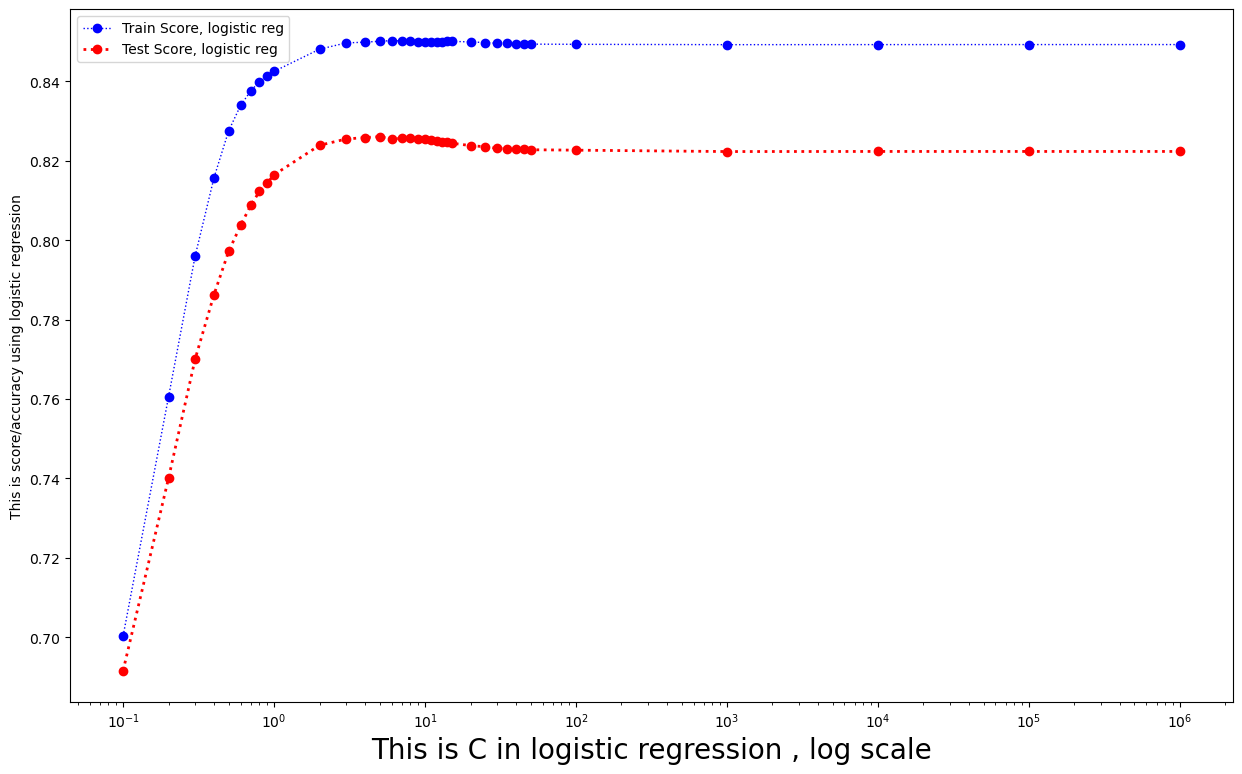

In [31]:
fig,ax = plt.subplots(figsize=(15,9))
ax.plot(different_C , permanent_train_score , lw=1 , color="b" , marker="o" , 
                                                      ls=":" , label="Train Score, logistic reg")
ax.plot(different_C , permanent_test_score , lw=2 , color="r" , marker="o" , 
                                                      ls=":" , label="Test Score, logistic reg")
ax.legend()
ax.set_xlabel("This is C in logistic regression , log scale" , fontsize=20)
ax.set_ylabel("This is score/accuracy using logistic regression", fontsize=10)
ax.set_xscale("log")

##### C terbaik terletak antara 1 dan 10.
##### Hasil menunjukkan bahwa "C" terbaik adalah 5 dengan akurasi 82,6%

### K-Nearest Neighbors

In [32]:
X_train , X_test , y_train , y_test = train_test_split(X_scaled , y , random_state=0)
# ------------------------------------------------------------------------------------------------------
print(f"X_scaled.shape is: {X_scaled.shape} & y.shape is: {y.shape}" )
print("")
print(f"X_train.shape is: {X_train.shape} & y_train.shape is: {y_train.shape}" )
print("")
print(f"X_test.shape is: {X_test.shape} & y_test.shape is: {y_test.shape}" )

X_scaled.shape is: (299, 12) & y.shape is: (299,)

X_train.shape is: (224, 12) & y_train.shape is: (224,)

X_test.shape is: (75, 12) & y_test.shape is: (75,)


In [33]:
knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(X_train , y_train)
print("for random_state=0 and n_neigbors=1, Train accuracy is: ", knn_classifier.score(X_train , y_train) )
print("for random_state=0 and n_neigbors=1, Test accuracy is: ", knn_classifier.score(X_test , y_test) )

# Hanya membahas random_state=0 dan n_neighbors=1 yang tidak dapat diterapkan.
# Harus menggeneralisasikannya

for random_state=0 and n_neigbors=1, Train accuracy is:  1.0
for random_state=0 and n_neigbors=1, Test accuracy is:  0.6666666666666666


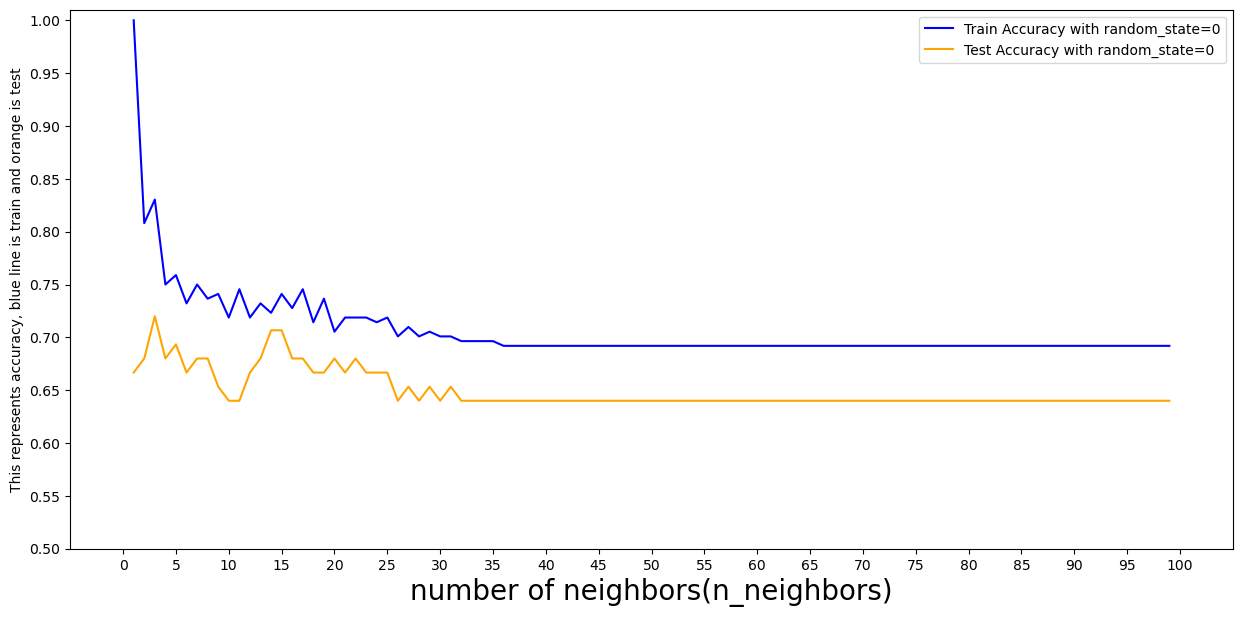

In [34]:
number_of_neighbors = range(1,100)

train_accuracy = []
test_accuracy = []

for i in number_of_neighbors:
    knn_classifier = KNeighborsClassifier( n_neighbors=i )
    knn_classifier.fit(X_train , y_train)
    train_accuracy.append( knn_classifier.score(X_train,y_train) )
    test_accuracy.append( knn_classifier.score(X_test,y_test) )

fig , ax = plt.subplots(figsize=(15,7))
ax.plot(number_of_neighbors , train_accuracy , color="blue" ,label="Train Accuracy with random_state=0")
ax.plot(number_of_neighbors , test_accuracy , color="orange" ,label="Test Accuracy with random_state=0")
ax.set_xlim([-5,105])
ax.set_ylim([0.5,1.01])
ax.set_xticks(np.arange(0,105,5))
ax.set_yticks(np.arange(0.5,1.01,0.05))
ax.set_xlabel("number of neighbors(n_neighbors)", fontsize=20)
ax.set_ylabel("This represents accuracy, blue line is train and orange is test", fontsize=10)
ax.legend()

# terdapat pengaruh "n_neighbours" pada akurasi pengujian

Dari grafik ini, dapat dilihat bahwa akurasi training meningkat seiring dengan peningkatan n_neighbors. Ini karena semakin besar n_neighbors, semakin banyak data yang digunakan untuk menghitung prediksi. Akibatnya, model KNN menjadi lebih akurat dalam memprediksi kelas data training.
Namun, akurasi testing menurun seiring dengan peningkatan n_neighbors. Ini karena model KNN menjadi terlalu sensitif terhadap noise dalam data training. Akibatnya, model KNN menjadi lebih buruk dalam memprediksi kelas data testing.
Berdasarkan grafik ini, nilai optimal untuk n_neighbors adalah sekitar 10. Pada nilai ini, akurasi training dan testing relatif seimbang.

### Support Vector Machine

In [35]:
inp_df = df.drop(df[['DEATH_EVENT']], axis=1)
out_df = df[['DEATH_EVENT']]

scaler = StandardScaler()
inp_df = scaler.fit_transform(inp_df)

X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size=0.2, random_state=42)

In [36]:
print("X_train Shape : ", X_train.shape)
print("X_test Shape  : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape  : ", y_test.shape)

X_train Shape :  (239, 12)
X_test Shape  :  (60, 12)
y_train Shape :  (239, 1)
y_test Shape  :  (60, 1)


In [37]:
clf = SVC(C=10, gamma=0.1, kernel='linear') 
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.8000
SVC f1-score  : 0.7143
SVC precision : 0.6000
SVC recall    : 0.8824

               precision    recall  f1-score   support

           0       0.94      0.77      0.85        43
           1       0.60      0.88      0.71        17

    accuracy                           0.80        60
   macro avg       0.77      0.82      0.78        60
weighted avg       0.85      0.80      0.81        60



In [38]:
clf = SVC(C=10, gamma=0.1, kernel='linear') 
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.8000
SVC f1-score  : 0.7143
SVC precision : 0.6000
SVC recall    : 0.8824

               precision    recall  f1-score   support

           0       0.94      0.77      0.85        43
           1       0.60      0.88      0.71        17

    accuracy                           0.80        60
   macro avg       0.77      0.82      0.78        60
weighted avg       0.85      0.80      0.81        60



In [39]:
# temukan parameter terbaik dengan SVC

kernels = list(['linear'])
c = list([5,10,15,20,25,30])
gammas = list([0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

clf = SVC()
clf.fit(X_train, y_train) 
param_grid = dict(kernel=kernels, C=c, gamma=gammas)
grid = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_

{'C': 5, 'gamma': 0.05, 'kernel': 'linear'}

In [40]:
clf = SVC(C=5, gamma=0.05, kernel='linear') 
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.8167
SVC f1-score  : 0.7317
SVC precision : 0.6000
SVC recall    : 0.9375

               precision    recall  f1-score   support

           0       0.97      0.77      0.86        44
           1       0.60      0.94      0.73        16

    accuracy                           0.82        60
   macro avg       0.79      0.86      0.80        60
weighted avg       0.87      0.82      0.83        60



<AxesSubplot:>

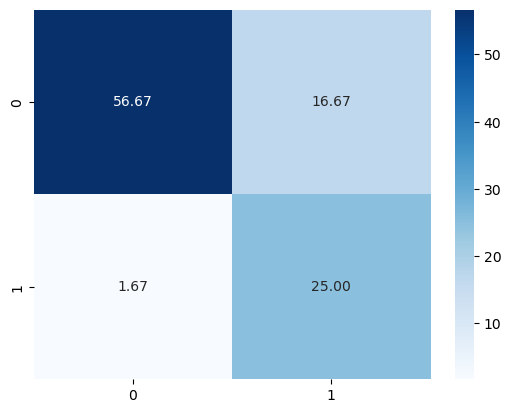

In [41]:
y_pred = clf.predict(X_test)

cf_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap((cf_matrix / np.sum(cf_matrix)*100), annot = True, fmt=".2f", cmap="Blues")

Prediksi benar -> %89,02 (361 dari 406 prediksi benar)

True Negative -> %42.68 -> Mereka yang diprediksi tidak mati dan tidak mati
True Positive -> %46.34 -> Mereka yang diprediksi meninggal dan memang meninggal
Prediksi salah-> %10,98 (45 dari 406 prediksi salah)

False Positive -> %03.66 -> Mereka yang diprediksi meninggal namun tidak meninggal
False Negative -> %07.32 -> Mereka yang diprediksi tidak mati namun ternyata mati

### Decision Tree

In [42]:
x_dt = df.drop('DEATH_EVENT', axis=1)
X_dt = x_dt.values
y_dt = df['DEATH_EVENT'].values
x_dt_train, x_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y_dt, test_size=0.2, random_state=1)

In [43]:
for i in range(4, 10):
    death_tree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    death_tree.fit(x_dt_train, y_dt_train)
    pred_death = death_tree.predict(x_dt_test)
    print('Dengan max_depth sebesar {} , akurasi death_tree adalah {}'.format (i, metrics.accuracy_score(y_dt_test, pred_death)))

Dengan max_depth sebesar 4 , akurasi death_tree adalah 0.8333333333333334
Dengan max_depth sebesar 5 , akurasi death_tree adalah 0.85
Dengan max_depth sebesar 6 , akurasi death_tree adalah 0.9333333333333333
Dengan max_depth sebesar 7 , akurasi death_tree adalah 0.9
Dengan max_depth sebesar 8 , akurasi death_tree adalah 0.9
Dengan max_depth sebesar 9 , akurasi death_tree adalah 0.9


output di atas menunjukkan akurasi terbaik dari model dengan depth berbeda dan model memberikan akurasi maksimum 0,9 yang menyetujui model tersebut.

In [44]:
from sklearn import tree
import graphviz

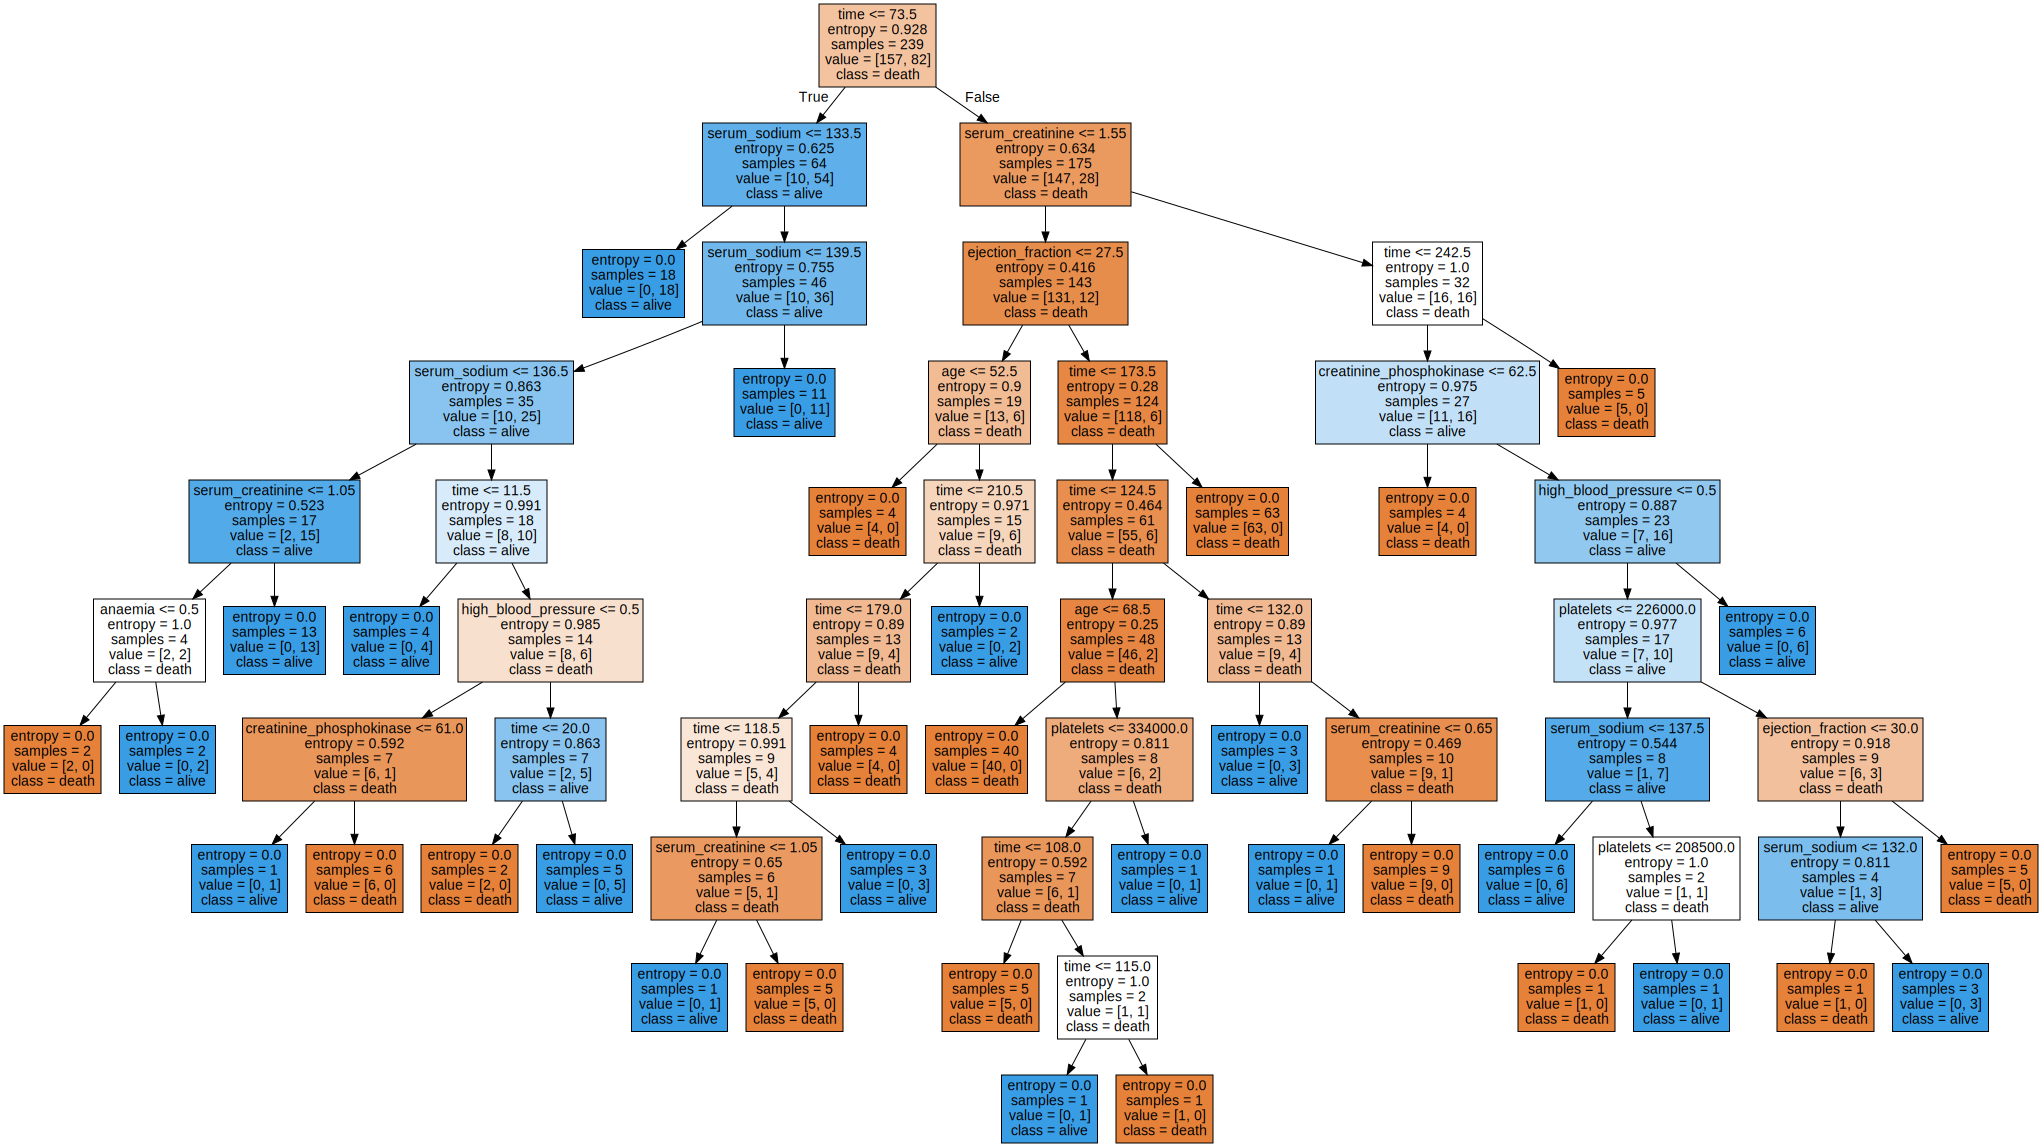

<Figure size 20000x20000 with 0 Axes>

In [45]:
plt.figure(figsize=(200, 200))
filename ='death_tree.png'

featureNames = df.columns[:-1]
targetNames = ['death', 'alive']

dot_data = tree.export_graphviz(death_tree, feature_names=featureNames, class_names=targetNames,filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

### Random Forest

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled , y) 

In [47]:
different_max_depth = np.arange(1,50)
different_n_estimator = [100,200,300]

In [48]:
train_score_for_each_n_estimator_using_different_max_depth = []
test_score_for_each_n_estimator_using_different_max_depth = []

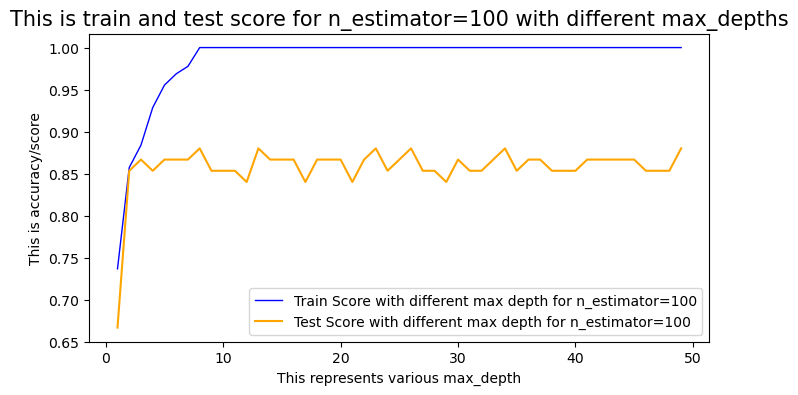

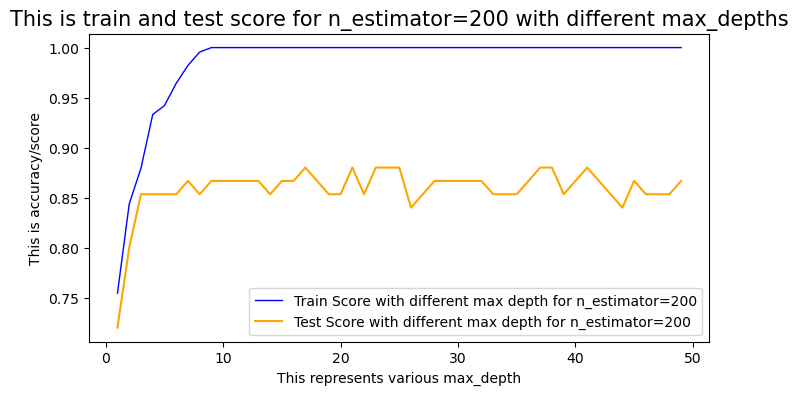

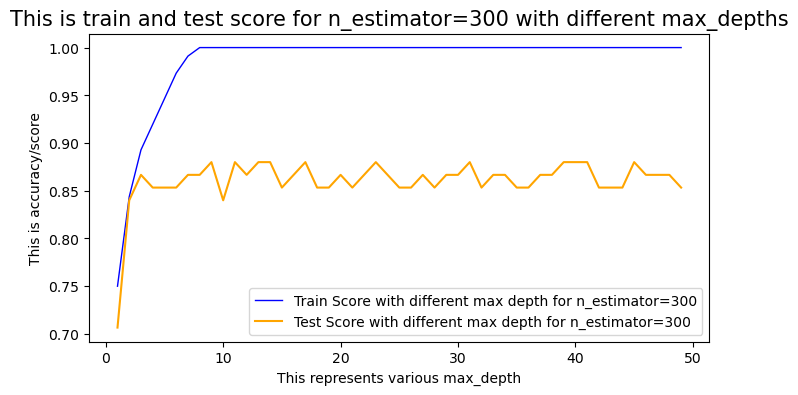

In [49]:
for i in different_n_estimator:
    for j in different_max_depth:
        random_forest = RandomForestClassifier(n_estimators=i , max_depth=j)
        random_forest.fit(X_train,y_train)
        train_score = random_forest.score(X_train,y_train)
        test_score = random_forest.score(X_test,y_test)
        train_score_for_each_n_estimator_using_different_max_depth.append(train_score)
        test_score_for_each_n_estimator_using_different_max_depth.append(test_score)
    fig , ax = plt.subplots(figsize=(8,4))
    ax.plot(different_max_depth , train_score_for_each_n_estimator_using_different_max_depth , 
           color="b" , lw=1 , ls="-" , 
            label=f"Train Score with different max depth for n_estimator={i}")
    ax.plot(different_max_depth , test_score_for_each_n_estimator_using_different_max_depth , 
           color="orange" , lw=1.5 , ls="-" , 
            label=f"Test Score with different max depth for n_estimator={i}")
    ax.legend()
    ax.set_title(f"This is train and test score for n_estimator={i} with different max_depths"
                , fontsize=15)
    ax.set_xlabel("This represents various max_depth")
    ax.set_ylabel("This is accuracy/score")
    train_score_for_each_n_estimator_using_different_max_depth = []
    test_score_for_each_n_estimator_using_different_max_depth = []

dengan menggunakan "n_estimator" yang lebih tinggi kita mempertimbangkan lebih banyak pohon acak,
lebih banyak random forest akan menghasilkan skor tes yang lebih baik,
n_estimator yang sangat tinggi menyebabkan peningkatan waktu berjalan dan beban berat pada CPU.
parameter lain yang digunakan adalah "max_depth".
peningkatan "max_depth" berarti model yang lebih kompleks, tetapi harus mencapai keseimbangan untuk "max_depth".
Sangat tinggi berarti model terlalu pas dan sangat rendah berarti model kurang pas.
Fitur maksimal untuk model ini adalah defaultnya, yaitu sama dengan "features=sqrt".
Karena skor tes yang paling sering berfluktuasi antara 80% dan 85% mungkin 83% adalah hasil yang baik untuk dilaporkan

# Evaluasi Model

### Logistic Regression

In [50]:
various_random_states = np.arange(1,2000)
train_score = []
test_score = []

log_reg = LogisticRegression(C=5)
for i in various_random_states:
    X_train,X_test,y_train,y_test = train_test_split(X_scaled, y, random_state=i)
    log_reg.fit(X_train , y_train)
    train_score.append( log_reg.score(X_train,y_train) )
    test_score.append( log_reg.score(X_test,y_test) )
    
train_score_mean = sum(train_score) / len(train_score)
test_score_mean = sum(test_score) / len(test_score)

print(f"With C=5 using Logistic Regression, we could achieve train score of: {train_score_mean}")
print(f"With C=5 using Logistic Regression, we could achieve test score of: {test_score_mean}"  )

With C=5 using Logistic Regression, we could achieve train score of: 0.8505368755806495
With C=5 using Logistic Regression, we could achieve test score of: 0.8240053360013203


##### Dapat dilihat pada sel di atas, dengan menggunakan 2000 random state dapat mencapai skor tes sebesar 82,4%

### K-Nearest Neighbors

In [51]:
various_random_states = np.arange(0,900+1,3)
different_n_neighbors = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35]

temproary_list_for_each_n_neighbor_train_accuracy = []
temproary_list_for_each_n_neighbor_test_accuracy = []
permanent_list_for_each_n_neighbor_train_accuracy = []
permanent_list_for_each_n_neighbor_test_accuracy = []

for i in different_n_neighbors:
    knn_classifier = KNeighborsClassifier( n_neighbors=i )
    for j in various_random_states:
        X_train,X_test,y_train,y_test = train_test_split(X_scaled , y , random_state=j)
        knn_classifier.fit(X_train, y_train)
        temproary_list_for_each_n_neighbor_train_accuracy.append( knn_classifier.score(X_train,y_train) )
        temproary_list_for_each_n_neighbor_test_accuracy.append( knn_classifier.score(X_test,y_test) )
    mean_of_train_accuracy = sum(temproary_list_for_each_n_neighbor_train_accuracy) / len(
        temproary_list_for_each_n_neighbor_train_accuracy)
    mean_of_test_accuracy = sum(temproary_list_for_each_n_neighbor_test_accuracy) / len(
        temproary_list_for_each_n_neighbor_test_accuracy)
    temproary_list_for_each_n_neighbor_train_accuracy = []
    temproary_list_for_each_n_neighbor_test_accuracy = []
    permanent_list_for_each_n_neighbor_train_accuracy.append( mean_of_train_accuracy )
    permanent_list_for_each_n_neighbor_test_accuracy.append( mean_of_test_accuracy )

In [52]:
permanent_list_for_each_n_neighbor_train_accuracy

[1.0,
 0.8290519696250597,
 0.7827776459420978,
 0.7549388941623163,
 0.7487393213099195,
 0.7480274086378742,
 0.747982914095871,
 0.7469447081158045,
 0.7433258186995725,
 0.7374673706691984,
 0.7301850972947326,
 0.7227396772662552,
 0.7141077361177025,
 0.7068254627432368,
 0.7016196013289033,
 0.6963692453725676,
 0.6925872093023262,
 0.689665401044139]

In [53]:
permanent_list_for_each_n_neighbor_test_accuracy

[0.6696788482834984,
 0.7007308970099665,
 0.6827906976744187,
 0.6849169435215939,
 0.7001993355481723,
 0.7102547065337759,
 0.7184939091915828,
 0.7192912513842742,
 0.7145071982281286,
 0.7125581395348835,
 0.7088372093023251,
 0.7040974529346612,
 0.6989147286821703,
 0.6963012181616827,
 0.6926688815060904,
 0.6904983388704312,
 0.6877962347729782,
 0.6859800664451821]

In [54]:
for i in range(len(different_n_neighbors)):
    print(f"For n_neighbors={different_n_neighbors[i]} , Train Accuracy is: {permanent_list_for_each_n_neighbor_train_accuracy[i]}" )
    print(f"For n_neighbors={different_n_neighbors[i]} , Test Accuracy is: {permanent_list_for_each_n_neighbor_test_accuracy[i]}" )
    print("-------------------------------------------------------------------")

For n_neighbors=1 , Train Accuracy is: 1.0
For n_neighbors=1 , Test Accuracy is: 0.6696788482834984
-------------------------------------------------------------------
For n_neighbors=3 , Train Accuracy is: 0.8290519696250597
For n_neighbors=3 , Test Accuracy is: 0.7007308970099665
-------------------------------------------------------------------
For n_neighbors=5 , Train Accuracy is: 0.7827776459420978
For n_neighbors=5 , Test Accuracy is: 0.6827906976744187
-------------------------------------------------------------------
For n_neighbors=7 , Train Accuracy is: 0.7549388941623163
For n_neighbors=7 , Test Accuracy is: 0.6849169435215939
-------------------------------------------------------------------
For n_neighbors=9 , Train Accuracy is: 0.7487393213099195
For n_neighbors=9 , Test Accuracy is: 0.7001993355481723
-------------------------------------------------------------------
For n_neighbors=11 , Train Accuracy is: 0.7480274086378742
For n_neighbors=11 , Test Accuracy is: 0.

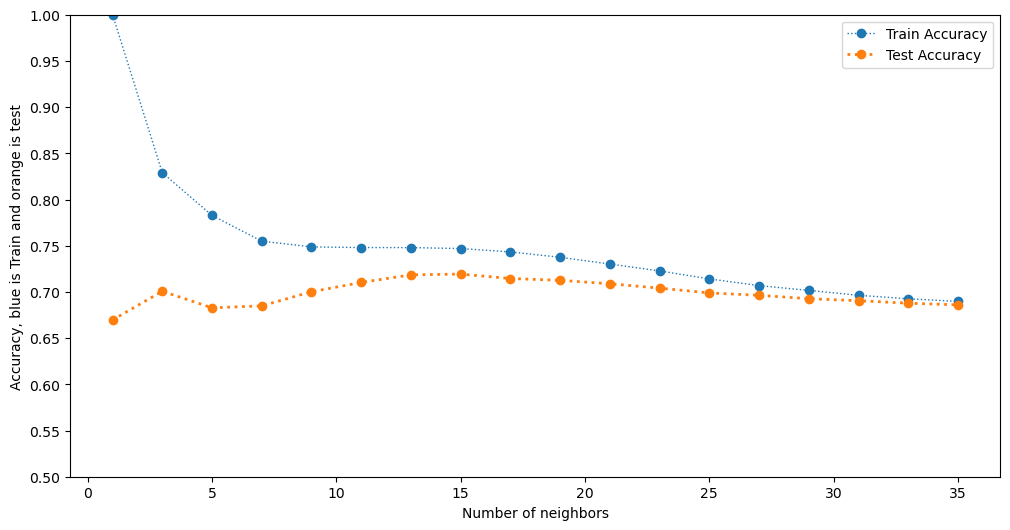

In [55]:
fig , ax = plt.subplots(figsize=(12,6))
ax.plot(different_n_neighbors , permanent_list_for_each_n_neighbor_train_accuracy , 
          label="Train Accuracy" , marker="o", lw=1 , linestyle=":")
ax.plot(different_n_neighbors , permanent_list_for_each_n_neighbor_test_accuracy ,
          label="Test Accuracy" , marker="o" , lw=2 , linestyle=":")
ax.set_xlabel("Number of neighbors")
ax.set_ylabel("Accuracy, blue is Train and orange is test")
ax.set_ylim([0.5 , 1])
ax.set_yticks(np.arange(0.5,1+0.01,0.05))
ax.legend()

##### Bagan sebelumnya menunjukkan keakuratan yang sesuai karena menggunakan banyak "random_state" yang berbeda
##### Skor tes terbaik yang dapat dicapai dengan menggunakan KNN adalah 71,9%

### Support Vector Machine

In [56]:
sms = SMOTE(random_state=12345)
X_res, y_res = sms.fit_resample(inp_df, out_df)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

print("X_train Shape : ", X_train.shape)
print("X_test Shape  : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape  : ", y_test.shape)

X_train Shape :  (324, 12)
X_test Shape  :  (82, 12)
y_train Shape :  (324, 1)
y_test Shape  :  (82, 1)


In [57]:
kernels = list(['linear', 'rbf', 'poly', 'sigmoid'])
c = list([20,25,30,35,40,45,50])
gammas = list([0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

clf = SVC()
param_grid = dict(kernel=kernels, C=c, gamma=gammas)
grid = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_

{'C': 30, 'gamma': 0.08, 'kernel': 'rbf'}

In [58]:
clf = SVC(C=30, gamma=0.08, kernel='rbf') 
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.8780
SVC f1-score  : 0.8780
SVC precision : 0.8780
SVC recall    : 0.8780

               precision    recall  f1-score   support

           0       0.88      0.88      0.88        41
           1       0.88      0.88      0.88        41

    accuracy                           0.88        82
   macro avg       0.88      0.88      0.88        82
weighted avg       0.88      0.88      0.88        82



Prediksi benar -> %89,02 (361 dari 406 prediksi benar)

True Negative -> %42.68 -> Mereka yang diprediksi tidak mati dan tidak mati
True Positive -> %46.34 -> Mereka yang diprediksi meninggal dan memang meninggal
Prediksi salah-> %10,98 (45 dari 406 prediksi salah)

False Positive -> %03.66 -> Mereka yang diprediksi meninggal namun tidak meninggal
False Negative -> %07.32 -> Mereka yang diprediksi tidak mati namun ternyata mati

### Decision Tree

In [59]:
death_tree = DecisionTreeClassifier(criterion='entropy', max_depth=6)
death_tree.fit(x_dt_train, y_dt_train)
pred_death = death_tree.predict(x_dt_test)
print('Dengan max_depth sebesar {} , akurasi death_tree adalah {}'.format (6, metrics.accuracy_score(y_dt_test, pred_death)))

Dengan max_depth sebesar 6 , akurasi death_tree adalah 0.9333333333333333


### Random Forest

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)  

In [61]:
different_max_depth = np.arange(1,20)  

In [62]:
test_scores = []

for i in different_max_depth:
    random_forest = RandomForestClassifier(n_estimators=300 , max_depth=i , random_state=0)
    random_forest.fit(X_train,y_train)
    test_scores.append( random_forest.score(X_test,y_test) )
    
mean = sum(test_scores) / len(test_scores)


print(f"Rata-rata nilai test menggunakan 300 dengan max_depths yang berbeda (dari 1 hingga 20)",
      f"dapat mencapai nilai tes rata-rata sebesar  :   {mean}  " )

Rata-rata nilai test menggunakan 300 dengan max_depths yang berbeda (dari 1 hingga 20) dapat mencapai nilai tes rata-rata sebesar  :   0.8273684210526315  


Diperoleh sevesar 83%
ini adalah skor tes yang dapat saya capai menggunakan "RandomForestClassifier" pada kumpulan data ini dengan mengubah parameter kontrol dan tidak dapat menjamin bahwa ini adalah skor tes tertinggi yang mungkin

### Naive Bayes

Naive Bayes Prediction Accuracy Score:  0.733  with Smoothing =  8.111308307896856e-09


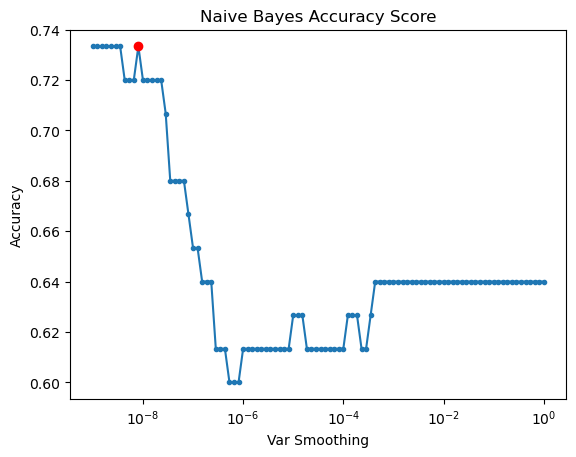

In [63]:
e_gnb=np.zeros(100)
params_NB = np.logspace(0,-9, num=100)
for i in range(0,len(params_NB)):
    gnb_model = GaussianNB(var_smoothing=params_NB[i])
    gnb_model.fit(X_train, y_train)
    yh_gnb=gnb_model.predict(X_test)
    e_gnb[i]=accuracy_score(y_test, yh_gnb)
    
print("Naive Bayes Prediction Accuracy Score: ",np.round(e_gnb.max(),3),' with Smoothing = ',params_NB[e_gnb.argmax()])
plt.plot(params_NB,e_gnb,'.-')
plt.plot(params_NB[e_gnb.argmax()],e_gnb.max(),'or')
plt.title('Naive Bayes Accuracy Score')
plt.xscale('log')
plt.xlabel('Var Smoothing')
plt.ylabel('Accuracy')
plt.show()

# Kesimpulan

##### Dari beberapa metode Machine Learning yang digunakan pada dataset ini, Decision Tree menjadi metode yang memiliki nilai akurasi tertinggi, yaitu sebesar 93,3%. Sedangkan untuk K-Nearest Neighbors menjadi metode dengan nilai akurasi terendah, yaitu sebesar 71,9%.

Nilai optimal untuk n_neighbors tergantung pada karakteristik data yang digunakan. Jika data memiliki banyak noise, maka nilai n_neighbors yang lebih kecil mungkin lebih baik. Jika data relatif bersih, maka nilai n_neighbors yang lebih besar mungkin lebih baik. Nilai n_neighbors yang optimal dapat ditemukan dengan memulai dengan nilai yang kecil dan meningkatkannya secara bertahap hingga akurasi training dan testing mencapai keseimbangan.
Pasien kanker payudara paling banyak berusia antara 50 hingga 60 tahun. Pasien kanker payudara perempuan lebih banyak dibandingkan laki-laki. Pasien kanker payudara yang meninggal cenderung lebih tua dibandingkan pasien kanker payudara yang selamat. Pasien kanker payudara yang meninggal memiliki rata-rata usia 62 tahun, sedangkan pasien kanker payudara yang selamat memiliki rata-rata usia 55 tahun.